#Metode Penelitian

Tahapan Penelitian

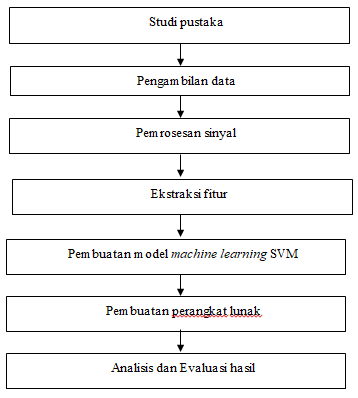

Tahapan Pemrosesan Sinyal

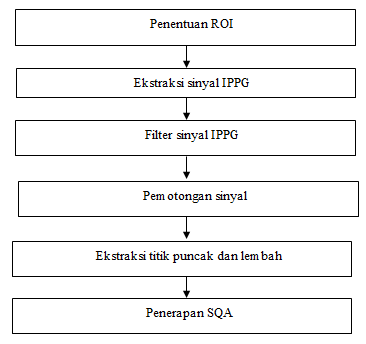

**Pengambilan Data**

Data yang diambil:

*   Video rekaman wajah 60 detik dengan kamera Hp 30 FPS
*   Kadar gula darah dengan tes gula darah sewaktu (Bertujuan untuk mengetahui kadar gula darah naracoba, baik diabetes atau tidak)
*   *Heart rate* (Mengetahui hubungan rPPG ke *Heart rate* dan membandingkannya dengan kadar gula darah) {perlu ditinjau ulang kontinu atau diskrit}
*   Identitas subjek (Nama, Domisili, Umur, Berat, Tinggi)

Hal yang perlu diawasi ([Sumber](https://osf.io/xjf7u/)):

*   Pencahayaan (intensitas cahaya dan sudut insiden)
*   Gerakan (gerakan kepala dan ekspresi wajah)

Peralatan yang dibutuhkan:

*   Hp, Tripod, Tambahan sumber cahaya, power bank
*   Glukometer
*   Alat ukur heart rate {dicari kontinu atau diskrit}
*   PC, timbangan, alat ukur tinggi, souvenir

Prosedur pengambilan data:

1.   Subjek penelitian duduk di kursi dengan tenang, tegak, dan menghadap kedepan.
2.   Subjek penelitian diberitahu untuk tidak berubah posisi selama proses perekaman wajah.
1.   Perekaman wajah dilakukan selama 60 detik menggunakan smartphone dan tripodnya.
2.   Setelah perekaman wajah selesai, dilakukan pengukuran kadar gula darah menggunakan Accu-Chek.
2.   Peneliti mendata nama, umur, berat badan, dan tinggi badan.

**Analisis yang perlu disiapkan**

1.   Pemrosesan sinyal:

> 1.   Penentuan ROI = keberhasilan mendapatkan ROI yang tepat pada semua gambar
2.   Ekstraksi IPPG = keberhasilan membentuk IPPG dari semua ROI
1.   Filter Sinyal = keberhasilan mendapatkan sinyal yang bersih dari noise (ditandai dengan siklus sinyal yang baik dan tidak ada trend)
2.   Pemotongan = Keberhasilan mendapatkan satu siklus sinyal
1.   Ekstraksi titik puncak dan lembah = keberhasilan mendapatkan titik sesuai pada seluruh data
2.   SQA = Seleksi data yang layak digunakan

2.   Ekstraksi fitur:

> 1.   Mencoba seluruh fitur yang ditentukan
2.   Seleksi fitur dengan menggunakan koefisien korelasi Pearson dan dianalisis dengan *heat map*

3. Pembuatan model machine learning SVM:

> 1.   Menentukan kernel function yang digunakan (menentukan parameter2nya juga)
2.   Menentukan susunan model ML, jumlah iterasi, dan lainnya
3. Menentukan metriks evaluasi

4. Pembuatan perangkat lunak

> 1.   Kesesuaian fungsionalitas
2.   UI/UX

**Perhitungan Sampel**



In [ ]:
# Connect ke google drive

# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

[link video tutorial koneksi onedrive ke colab](https://www.youtube.com/watch?v=U6YPgARhRzA&t=44s)

In [ ]:
!wget https://downloads.rclone.org/v1.58.1/rclone-v1.58.1-linux-amd64.deb
!apt install ./rclone-v1.58.1-linux-amd64.deb

--2022-10-31 23:03:27--  https://downloads.rclone.org/v1.58.1/rclone-v1.58.1-linux-amd64.deb
Resolving downloads.rclone.org (downloads.rclone.org)... 95.217.6.16, 2a01:4f9:c012:7154::1
Connecting to downloads.rclone.org (downloads.rclone.org)|95.217.6.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15407512 (15M) [application/vnd.debian.binary-package]
Saving to: ‘rclone-v1.58.1-linux-amd64.deb’

rclone-v1.58.1-linu 100%[===================>]  14.69M  12.1MB/s    in 1.2s    

2022-10-31 23:03:29 (12.1 MB/s) - ‘rclone-v1.58.1-linux-amd64.deb’ saved [15407512/15407512]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'rclone' instead of './rclone-v1.58.1-linux-amd64.deb'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  rclone
0 upgraded, 1 newly installed, 0 to rem

In [ ]:
!rclone config

2022/10/31 23:03:39 NOTICE: Config file "/root/.config/rclone/rclone.conf" not found - using defaults
No remotes found, make a new one?
n) New remote
s) Set configuration password
q) Quit config
n/s/q> n
name> onedrive
Option Storage.
Type of storage to configure.
Choose a number from below, or type in your own value.
 1 / 1Fichier
   \ (fichier)
 2 / Akamai NetStorage
   \ (netstorage)
 3 / Alias for an existing remote
   \ (alias)
 4 / Amazon Drive
   \ (amazon cloud drive)
 5 / Amazon S3 Compliant Storage Providers including AWS, Alibaba, Ceph, China Mobile, Digital Ocean, Dreamhost, IBM COS, Lyve Cloud, Minio, Netease, RackCorp, Scaleway, SeaweedFS, StackPath, Storj, Tencent COS and Wasabi
   \ (s3)
 6 / Backblaze B2
   \ (b2)
 7 / Better checksums for other remotes
   \ (hasher)
 8 / Box
   \ (box)
 9 / Cache a remote
   \ (cache)
10 / Citrix Sharefile
   \ (sharefile)
11 / Compress a remote
   \ (compress)
12 / Dropbox
   \ (dropbox)
13 / Encrypt/Decrypt a remote
   \ (crypt)
14 

In [ ]:
!sudo mkdir /content/onedrive
!nohup rclone --vfs-cache-mode writes mount onedrive: /content/onedrive &

nohup: appending output to 'nohup.out'


#Public Benchmark Dataset for Testing rPPG Algorithm Performance

In [ ]:
!wget https://data.4tu.nl/ndownloader/files/24023402

--2022-03-11 04:00:08--  https://data.4tu.nl/ndownloader/files/24023402
Resolving data.4tu.nl (data.4tu.nl)... 131.180.141.15
Connecting to data.4tu.nl (data.4tu.nl)|131.180.141.15|:443... connected.
HTTP request sent, awaiting response... 504 Gateway Time-out
Retrying.

--2022-03-11 04:00:14--  (try: 2)  https://data.4tu.nl/ndownloader/files/24023402
Reusing existing connection to data.4tu.nl:443.
HTTP request sent, awaiting response... 504 Gateway Time-out
Retrying.

--2022-03-11 04:00:22--  (try: 3)  https://data.4tu.nl/ndownloader/files/24023402
Reusing existing connection to data.4tu.nl:443.
HTTP request sent, awaiting response... 504 Gateway Time-out
Retrying.

--2022-03-11 04:00:30--  (try: 4)  https://data.4tu.nl/ndownloader/files/24023402
Reusing existing connection to data.4tu.nl:443.
HTTP request sent, awaiting response... 504 Gateway Time-out
Retrying.

--2022-03-11 04:00:39--  (try: 5)  https://data.4tu.nl/ndownloader/files/24023402
Reusing existing connection to data.4tu.

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/24023402', 'r') as zip:
    zip.printdir()
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

FileNotFoundError: ignored

In [ ]:
!cp -r /content/Public_Benchmark_Dataset_for_Testing_rPPG_Algorithm_Performance /content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose

In [ ]:
import os
import glob
import subprocess

coswara_data_dir = '/content/Public_Benchmark_Dataset_for_Testing_rPPG_Algorithm_Performance' 

dirs_all = set(map(os.path.basename,glob.glob('{}/P*'.format(coswara_data_dir))))

for d in dirs_all:
    p = subprocess.Popen('rm {}/{}/*.*'.format(coswara_data_dir, d), shell=True)
    p = subprocess.Popen('rm -r {}/{}'.format(coswara_data_dir, d), shell=True)
    p = subprocess.Popen('rm -r {}'.format(coswara_data_dir), shell=True)
    p.wait()

In [ ]:
!cp /content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Public_Benchmark_Dataset_for_Testing_rPPG_Algorithm_Performance/readme_rPPG_dataset.txt /content/
!cat readme_rPPG_dataset.txt

In [ ]:
formats_to_convert = ['.fys', 'rr']

# Perlu diubah
for (dirpath, dirnames, filenames) in os.walk("/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Public_Benchmark_Dataset_for_Testing_rPPG_Algorithm_Performance"):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):

            filepath = dirpath + '/' + filename
            (path, file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.', '')
            try:
                
                print('CONVERTING: ' + str(filepath))
                # os.remove(filepath)
            except:
                print("ERROR CONVERTING " + str(filepath))

#Coba2 colormap

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt

# Read
img = io.imread('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/38.mp4/1.mp4/frame0.jpg')

# Split
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

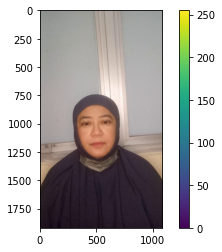

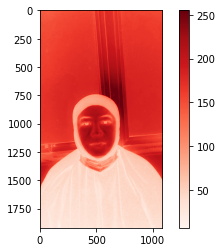

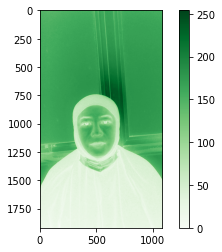

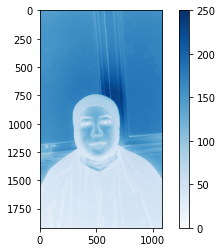

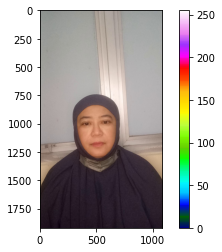

In [ ]:
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
fig.colorbar(cax_01, ax=axs)
plt.show()

fig, axs = plt.subplots()
cax_01 = axs.imshow(red, cmap='Reds')
fig.colorbar(cax_01, ax=axs)
plt.show()

fig, axs = plt.subplots()
cax_01 = axs.imshow(green, cmap='Greens')
fig.colorbar(cax_01, ax=axs)
plt.show()

fig, axs = plt.subplots()
cax_01 = axs.imshow(blue, cmap='Blues')
fig.colorbar(cax_01, ax=axs)
plt.show()

fig, axs = plt.subplots()
cax_01 = axs.imshow(img, cmap=plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

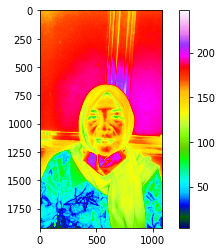

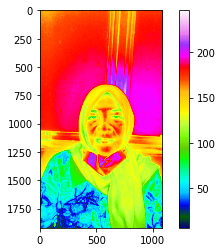

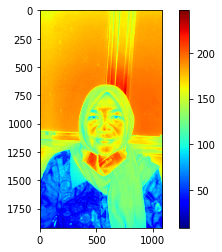

In [ ]:
import imageio
import numpy as np

pic = imageio.imread('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/32.mp4/1.mp4/frame0.jpg')

# Luminosity
color_1 = lambda rgb : np.dot(rgb[... , :3] , [0.21 , 0.72, 0.07]) 
color_1 = color_1(pic)  

fig, axs = plt.subplots()
cax_01 = axs.imshow(color_1, cmap = plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

# Average Brightness
color_2 = lambda rgb : np.dot(rgb[... , :3] , [1/3 , 1/3, 1/3]) 
color_2 = color_2(pic)

fig, axs = plt.subplots()
cax_01 = axs.imshow(color_2, cmap = plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

# Lightness
color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_4 = color_4(pic)
color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_5 = color_5(pic)
color_6 = (color_4.astype(int) + color_5.astype(int))/2

fig, axs = plt.subplots()
cax_01 = axs.imshow(color_6, cmap = plt.get_cmap(name = 'jet'))
fig.colorbar(cax_01, ax=axs)
plt.show()

In [ ]:
print(type(color_6))

<class 'imageio.core.util.Array'>


In [ ]:
print(color_6)

[[141.  144.  145.  ... 151.  153.  155. ]
 [148.  150.  140.  ... 153.  152.  152. ]
 [154.  148.  138.  ... 154.  151.  149. ]
 ...
 [ 18.5  22.5  27.  ...  29.   27.   27. ]
 [ 26.5  26.5  26.  ...  23.   24.   33. ]
 [ 19.5  17.5  17.  ...  20.   19.   30. ]]


In [ ]:
imageio.imsave("/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/test.png", color_6.astype())

In [ ]:
pic = imageio.imread('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/test.png')

In [ ]:
print(type(pic))

<class 'imageio.core.util.Array'>


In [ ]:
print(color_6.astype(int))

[[141 144 145 ... 151 153 155]
 [148 150 140 ... 153 152 152]
 [154 148 138 ... 154 151 149]
 ...
 [ 18  22  27 ...  29  27  27]
 [ 26  26  26 ...  23  24  33]
 [ 19  17  17 ...  20  19  30]]


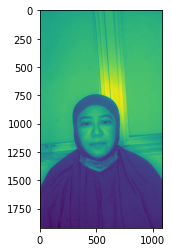

In [ ]:
fig, axs = plt.subplots()
cax_01 = axs.imshow(pic, cmap = plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

In [ ]:
from PIL import Image

im = Image.open('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Foto Wajah.jpg') # Can be many different formats.
pix = im.load()
print(im.size)  # Get the width and hight of the image for iterating over
print(pix[0,0])  # Get the RGBA Value of the a pixel of an image

(3264, 2448)
(219, 219, 129)


#Coba-coba rotate gambar dan video (frame)

**ROTASI GAMBAR**

In [ ]:
path_gambar = "/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Foto Wajah.jpg"

In [ ]:
# Menggunakan PIL

# import the Python Image
# processing Library
from PIL import Image
 
# Giving The Original image Directory
# Specified
Original_Image = Image.open(path_gambar)
 
# Rotate Image By 180 Degree
rotated_image1 = Original_Image.rotate(180)

# This is Alternative Syntax To Rotate
# The Image
rotated_image2 = Original_Image.transpose(Image.ROTATE_90)
 
# This Will Rotate Image By 60 Degree
rotated_image3 = Original_Image.rotate(60)
 
rotated_image1

In [ ]:
rotated_image2

In [ ]:
rotated_image3

In [ ]:
# Menggunakan OpenCV

import cv2  # importing cv
import imutils 
from google.colab.patches import cv2_imshow
 
# read an image as input using OpenCV
image = cv2.imread(path_gambar)
 
Rotated_image = imutils.rotate(image, angle=45)
Rotated1_image = imutils.rotate(image, angle=90)
 
# display the image using OpenCV of
# angle 45
cv2_imshow(Rotated_image)
 
# display the image using OpenCV of
# angle 90
cv2_imshow(Rotated1_image)
 
# This is used for To Keep On Displaying
# The Image Untill Any Key is Pressed
cv2.waitKey(0)

**ROTASI VIDEO (FRAME)**

In [ ]:
import cv2
import os

path_umum = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2'
path_khusus = 'Coba2'
path_simpan = "{}/{}".format(path_umum,path_khusus)

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

# Opens the Video file
cap= cv2.VideoCapture('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Coba2.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    if ret == False:
        break
    cv2.imwrite("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'),frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

In [ ]:
import imageio
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

img = io.imread('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Coba2/frame1.jpg')

#Gambar asli
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
fig.colorbar(cax_01, ax=axs)
plt.show()

pic = imageio.imread('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Coba2/frame1.jpg')

# Lightness
color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_4 = color_4(pic)
color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_5 = color_5(pic)
color_6 = (color_4.astype(int) + color_5.astype(int))/2

fig, axs = plt.subplots()
cax_01 = axs.imshow(color_6, cmap = plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

#Percobaan colormap dalam beberapa intensitas cahaya

**Set up eksperimen**

Percobaan dilakukan dalam 4 kondisi berdasarkan sumber cahaya:
*   Cahaya lingkungan (dengan cahaya matahari)
*   Cahaya lampu LED
*   Cahaya lampu pijar 25 watt
*   Cahaya lampu pijar 5 watt

Kondisi saat percobaan ditunjukkan pada gambar berikut:

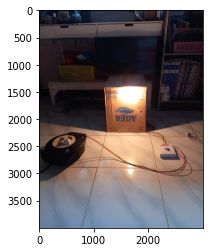

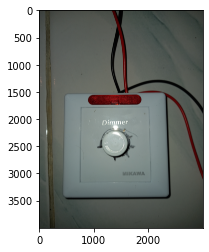

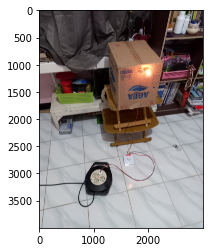

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt

# Read
img = io.imread('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/20211127_060638.jpg')
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
plt.show()

img = io.imread('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/20211127_060956.jpg')
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
plt.show()

img = io.imread('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/20211127_062524.jpg')
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
plt.show()

Pada gambar dimmer, terdapat beberapa garis yang akan menjadi variasi intensitas cahaya pada percobaan dengan lampu pijar.

Berikut hasil percobaan colormap pada **kelompok 1**

In [ ]:
import cv2
import os

path_umum = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru'
path_khusus = 'depanCahaya/Frame'
path_simpan = "{}/{}".format(path_umum,path_khusus)

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

# Opens the Video file
cap= cv2.VideoCapture('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru/depanCahaya.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    if ret == False:
        break
    cv2.imwrite("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'),frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

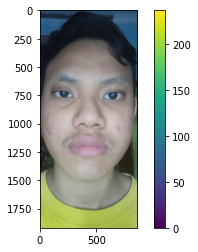

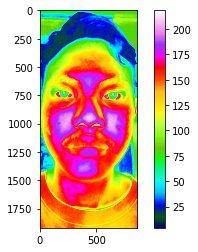

In [ ]:
import imageio
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

img = io.imread('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru/depanCahaya/Frame/frame0.jpg')

#Gambar asli
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
fig.colorbar(cax_01, ax=axs)
plt.show()

pic = imageio.imread('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru/depanCahaya/Frame/frame0.jpg')

# Lightness
color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_4 = color_4(pic)
color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_5 = color_5(pic)
color_6 = (color_4.astype(int) + color_5.astype(int))/2

fig, axs = plt.subplots()
cax_01 = axs.imshow(color_6, cmap = plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

Berikut hasil percobaan colormap pada **kelompok 2**

In [ ]:
import cv2
import os

path_umum = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru'
path_khusus = 'belakangCahaya/Frame'
path_simpan = "{}/{}".format(path_umum,path_khusus)

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

# Opens the Video file
cap= cv2.VideoCapture('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru/belakangCahaya.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    if ret == False:
        break
    cv2.imwrite("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'),frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

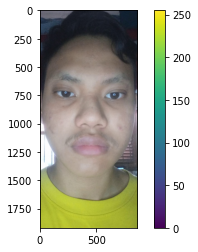

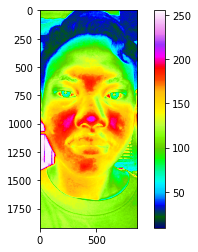

In [ ]:
import imageio
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

img = io.imread("{}/{}".format(path_simpan,'frame0.jpg'))

#Gambar asli
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
fig.colorbar(cax_01, ax=axs)
plt.show()

pic = imageio.imread("{}/{}".format(path_simpan,'frame0.jpg'))

# Lightness
color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_4 = color_4(pic)
color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_5 = color_5(pic)
color_6 = (color_4.astype(int) + color_5.astype(int))/2

fig, axs = plt.subplots()
cax_01 = axs.imshow(color_6, cmap = plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

Berikut hasil percobaan colormap pada **kelompok 3**

In [ ]:
import cv2
import os

path_umum = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru'
path_khusus = 'kananCahaya/Frame'
path_simpan = "{}/{}".format(path_umum,path_khusus)

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

# Opens the Video file
cap= cv2.VideoCapture('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru/kananCahaya.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    if ret == False:
        break
    cv2.imwrite("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'),frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

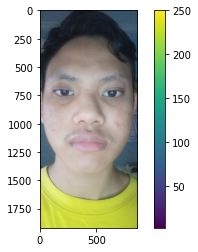

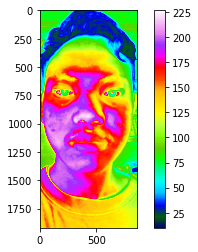

In [ ]:
import imageio
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

img = io.imread("{}/{}".format(path_simpan,'frame0.jpg'))

#Gambar asli
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
fig.colorbar(cax_01, ax=axs)
plt.show()

pic = imageio.imread("{}/{}".format(path_simpan,'frame0.jpg'))

# Lightness
color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_4 = color_4(pic)
color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_5 = color_5(pic)
color_6 = (color_4.astype(int) + color_5.astype(int))/2

fig, axs = plt.subplots()
cax_01 = axs.imshow(color_6, cmap = plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

In [ ]:
# import cv2
# import os

# path_umum = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2'
# path_khusus = 'Cahaya Lampu Pijar 5 Skala/25 watt/Frame'
# path_simpan = "{}/{}".format(path_umum,path_khusus)

# if not os.path.exists(path_simpan):
#     os.makedirs(path_simpan)

# # Opens the Video file
# for video in os.listdir('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Cahaya Lampu Pijar 5 Skala/25 watt'):
#   file_video = "{}/{}".format('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Cahaya Lampu Pijar 5 Skala/25 watt', video)
#   path_simpan_skala = "{}/{}".format(path_simpan, video)

#   if not os.path.exists(path_simpan_skala):
#     os.makedirs(path_simpan_skala)

#   cap= cv2.VideoCapture(file_video)
#   i=0
#   while(cap.isOpened()):
#       ret, frame = cap.read()
#       frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
#       if ret == False:
#           break
#       cv2.imwrite("{}/{}".format(path_simpan_skala,'frame'+str(i)+'.jpg'),frame)
#       i+=1
 
#   cap.release()
#   cv2.destroyAllWindows()
#   print(video + " done")

In [ ]:
# import imageio
# import numpy as np
# import skimage.io as io
# import matplotlib.pyplot as plt

# index_video = 1

# path_delete = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Cahaya Lampu Pijar 5 Skala/25 watt/Frame/Frame'

# if os.path.exists(path_delete):
#     os.rmdir(path_delete)

# for folder in os.listdir(path_simpan):
#   print("Buka " + folder)
#   img = io.imread("{}/{}/{}".format(path_simpan,folder,'frame0.jpg'))

#   #Gambar asli
#   fig, axs = plt.subplots()
#   cax_01 = axs.imshow(img)
#   fig.colorbar(cax_01, ax=axs)
#   plt.show()

#   pic = imageio.imread("{}/{}/{}".format(path_simpan,folder,'frame0.jpg'))

#   # Lightness
#   color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
#   color_4 = color_4(pic)
#   color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
#   color_5 = color_5(pic)
#   color_6 = (color_4.astype(int) + color_5.astype(int))/2

#   fig, axs = plt.subplots()
#   cax_01 = axs.imshow(color_6, cmap = plt.get_cmap(name = 'gist_ncar'))
#   fig.colorbar(cax_01, ax=axs)
#   plt.show()

Berikut hasil percobaan colormap pada **kelompok 4**

In [ ]:
import cv2
import os

path_umum = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru'
path_khusus = 'kiriCahaya/Frame'
path_simpan = "{}/{}".format(path_umum,path_khusus)

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

# Opens the Video file
cap= cv2.VideoCapture('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru/kiriCahaya.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    if ret == False:
        break
    cv2.imwrite("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'),frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

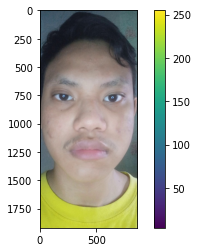

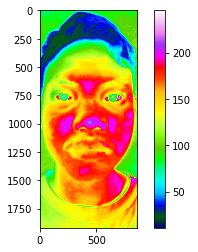

In [ ]:
import imageio
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

img = io.imread("{}/{}".format(path_simpan,'frame0.jpg'))

#Gambar asli
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
fig.colorbar(cax_01, ax=axs)
plt.show()

pic = imageio.imread("{}/{}".format(path_simpan,'frame0.jpg'))

# Lightness
color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_4 = color_4(pic)
color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
color_5 = color_5(pic)
color_6 = (color_4.astype(int) + color_5.astype(int))/2

fig, axs = plt.subplots()
cax_01 = axs.imshow(color_6, cmap = plt.get_cmap(name = 'gist_ncar'))
fig.colorbar(cax_01, ax=axs)
plt.show()

In [ ]:
# import cv2
# import os

# path_umum = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2'
# path_khusus = 'Cahaya Lampu Pijar 5 Skala/5 watt/Frame'
# path_simpan = "{}/{}".format(path_umum,path_khusus)

# if not os.path.exists(path_simpan):
#     os.makedirs(path_simpan)

# # Opens the Video file
# for video in os.listdir('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Cahaya Lampu Pijar 5 Skala/5 watt'):
#   file_video = "{}/{}".format('/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Cahaya Lampu Pijar 5 Skala/5 watt', video)
#   path_simpan_skala = "{}/{}".format(path_simpan, video)

#   if not os.path.exists(path_simpan_skala):
#     os.makedirs(path_simpan_skala)

#   cap= cv2.VideoCapture(file_video)
#   i=0
#   while(cap.isOpened()):
#       ret, frame = cap.read()
#       frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
#       if ret == False:
#           break
#       cv2.imwrite("{}/{}".format(path_simpan_skala,'frame'+str(i)+'.jpg'),frame)
#       i+=1
 
#   cap.release()
#   cv2.destroyAllWindows()
#   print(video + " done")

In [ ]:
# import imageio
# import numpy as np
# import skimage.io as io
# import matplotlib.pyplot as plt

# index_video = 1

# path_delete = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Cahaya Lampu Pijar 5 Skala/5 watt/Frame/Frame'

# if os.path.exists(path_delete):
#     os.rmdir(path_delete)

# for folder in os.listdir(path_simpan):
#   print("Buka " + folder)
#   if folder.startswith("2"):
#     img = io.imread("{}/{}/{}".format(path_simpan,folder,'frame0.jpg'))

#     #Gambar asli
#     fig, axs = plt.subplots()
#     cax_01 = axs.imshow(img)
#     fig.colorbar(cax_01, ax=axs)
#     plt.show()

#     pic = imageio.imread("{}/{}/{}".format(path_simpan,folder,'frame0.jpg'))

#     # Lightness
#     color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
#     color_4 = color_4(pic)
#     color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
#     color_5 = color_5(pic)
#     color_6 = (color_4.astype(int) + color_5.astype(int))/2

#     fig, axs = plt.subplots()
#     cax_01 = axs.imshow(color_6, cmap = plt.get_cmap(name = 'gist_ncar'))
#     fig.colorbar(cax_01, ax=axs)
#     plt.show()

**KESIMPULAN**

Terdapat perbedaan intensitas cahaya berdasarkan sumber cahaya yang digunakan. Namun ROI yang potensial tetap sama, yaitu hidung dan pipi.

#Percobaan MT-CNN (Bounding Box)

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 7.5 MB/s 


In [ ]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


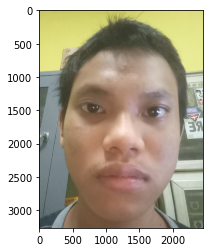

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt

# load image from file
filename = "/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Foto Wajah.jpg"
img = io.imread(filename)
fig, axs = plt.subplots()
cax_01 = axs.imshow(img)
plt.show()

{'left_eye': (2335, 1618), 'right_eye': (2353, 1618), 'nose': (2341, 1633), 'mouth_left': (2332, 1644), 'mouth_right': (2347, 1645)}


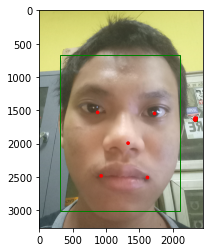

In [ ]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
  # load the image
  data = io.imread(filename)
  # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in result_list:
  # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    # draw the box
    ax.add_patch(rect)
  # show the plot
  # draw the dots
    for key, value in result['keypoints'].items():
      # create and draw dot
      dot = plt.Circle(value, radius=20, color='red')
      ax.add_patch(dot)
  print(result['keypoints'])
  plt.show()

# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
# load image from file
pixels = io.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

**ADVANCE MTCNN**

In [ ]:
!pip3 install torch torchvision torchaudio
!pip install facenet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 8.3 MB/s 


In [ ]:
from facenet_pytorch import MTCNN
from PIL import Image
import torch
from imutils.video import FileVideoStream
import cv2
import time
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

filenames = "/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba2 Baru/depanCahaya.mp4"

In [ ]:
class FastMTCNN(object):
    """Fast MTCNN implementation."""
    
    def __init__(self, stride, resize=1, *args, **kwargs):
        """Constructor for FastMTCNN class.
        
        Arguments:
            stride (int): The detection stride. Faces will be detected every `stride` frames
                and remembered for `stride-1` frames.
        
        Keyword arguments:
            resize (float): Fractional frame scaling. [default: {1}]
            *args: Arguments to pass to the MTCNN constructor. See help(MTCNN).
            **kwargs: Keyword arguments to pass to the MTCNN constructor. See help(MTCNN).
        """
        self.stride = stride
        self.resize = resize
        self.mtcnn = MTCNN(*args, **kwargs)
        
    def __call__(self, frames):
        """Detect faces in frames using strided MTCNN."""
        if self.resize != 1:
            frames = [
                cv2.resize(f, (int(f.shape[1] * self.resize), int(f.shape[0] * self.resize)))
                    for f in frames
            ]
                      
        boxes, probs = self.mtcnn.detect(frames[::self.stride])

        faces = []
        for i, frame in enumerate(frames):
            box_ind = int(i / self.stride)
            if boxes[box_ind] is None:
                continue
            for box in boxes[box_ind]:
                box = [int(b) for b in box]
                faces.append(frame[box[1]:box[3], box[0]:box[2]])
        
        return faces

In [ ]:
# define our extractor
fast_mtcnn = FastMTCNN(
stride=4,
resize=0.5,
margin=14,
factor=0.6,
keep_all=True,
device=device
)

In [ ]:
def run_detection(fast_mtcnn, filenames):
    frames = []
    frames_processed = 0
    faces_detected = 0
    batch_size = 60
    start = time.time()

    for filename in tqdm(filenames):

        v_cap = FileVideoStream(filename).start()
        v_len = int(v_cap.stream.get(cv2.CAP_PROP_FRAME_COUNT))

        for j in range(v_len):

            frame = v_cap.read()
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)

            if len(frames) >= batch_size or j == v_len - 1:

                faces = fast_mtcnn(frames)

                frames_processed += len(frames)
                faces_detected += len(faces)
                frames = []

                print(
                    'Frames per second: {frames_processed / (time.time() - start):.3f},',
                    'faces detected: {faces_detected}\r',
                    end=''
                )

        v_cap.stop()

In [ ]:
run_detection(fast_mtcnn, filenames)

  0%|          | 0/113 [00:00<?, ?it/s]

#Percobaan Facial Landmark Detection

**DENGAN MEDIA PIPE**

In [ ]:
!pip install MediaPipe==0.8.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.1 MB 321 kB/s 


In [ ]:
#Created by MediaPipe
#Modified by Augmented Startups 2021
#Face Mesh Landmarks in 5 Minutes
#Watch 5 Minute Tutorial at www.augmentedstartups.info/YouTube
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
import time

# For static images:
drawing_spec=mp_drawing.DrawingSpec(thickness=2, circle_radius=2)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:

    image = cv2.imread('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/38.mp4/1.mp4/frame0.jpg')  #Insert your Image Here
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not results.multi_face_landmarks:
        print("Continue")
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
    cv2.imwrite(r'/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba2/mesh.png', annotated_image)

face_landmarks: landmark {
  x: 0.4683699905872345
  y: 0.6028738021850586
  z: -0.047101061791181564
}
landmark {
  x: 0.4631710648536682
  y: 0.5732343792915344
  z: -0.07990158349275589
}
landmark {
  x: 0.46525517106056213
  y: 0.5823835730552673
  z: -0.04335426166653633
}
landmark {
  x: 0.4465377628803253
  y: 0.5449420213699341
  z: -0.05681561306118965
}
landmark {
  x: 0.4617154002189636
  y: 0.564225971698761
  z: -0.0842595025897026
}
landmark {
  x: 0.4601282477378845
  y: 0.5525155663490295
  z: -0.07707218080759048
}
landmark {
  x: 0.45676660537719727
  y: 0.5247095227241516
  z: -0.03280279040336609
}
landmark {
  x: 0.35177624225616455
  y: 0.5277062058448792
  z: 0.026212532073259354
}
landmark {
  x: 0.45379969477653503
  y: 0.5018184185028076
  z: -0.019632838666439056
}
landmark {
  x: 0.45218074321746826
  y: 0.49016913771629333
  z: -0.021015597507357597
}
landmark {
  x: 0.4472433030605316
  y: 0.4552958011627197
  z: 0.0009022309677675366
}
landmark {
  x: 0.4

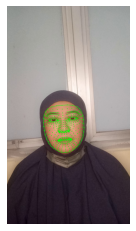

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt

# Read
img = io.imread('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba2/mesh.png')

plt.imshow(img)
plt.axis('off')
plt.show()

**DENGAN DLIB**

In [ ]:
!pip install --upgrade imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
!unzip -qq facial-landmarks.zip
%cd facial-landmarks

--2022-10-21 01:52:13--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.242.57
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.242.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74572347 (71M) [binary/octet-stream]
Saving to: ‘facial-landmarks.zip’

facial-landmarks.zi 100%[===================>]  71.12M  17.5MB/s    in 5.1s    

2022-10-21 01:52:19 (14.0 MB/s) - ‘facial-landmarks.zip’ saved [74572347/74572347]

/content/facial-landmarks


In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2

In [ ]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-p", "--shape-predictor", required=True,
#	help="path to facial landmark predictor")
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"shape_predictor": "shape_predictor_68_face_landmarks.dat",
	"image": '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Foto Wajah.jpg'
}

In [ ]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

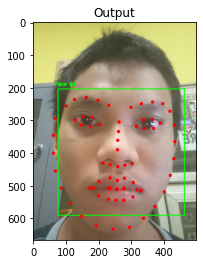

In [ ]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
	  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 5, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
plt_imshow("Output", image)

#Percobaan Bounding Box untuk ROI Spesifik (Hidung dan Pipi)

**DENGAN DLIB**

In [ ]:
!wget https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg

--2022-09-29 01:55:39--  https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg
Resolving www.pyimagesearch.com (www.pyimagesearch.com)... 45.33.87.127
Connecting to www.pyimagesearch.com (www.pyimagesearch.com)|45.33.87.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25312 (25K) [image/jpeg]
Saving to: ‘facial_landmarks_68markup-768x619.jpg’

facial_landmarks_68 100%[===================>]  24.72K  --.-KB/s    in 0s      

2022-09-29 01:55:39 (256 MB/s) - ‘facial_landmarks_68markup-768x619.jpg’ saved [25312/25312]



In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt

# Read
# img = io.imread('/content/facial-landmarks/facial_landmarks_68markup-768x619.jpg')

# fig = plt.imshow(img)
# plt.show()

In [ ]:
# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2

In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-p", "--shape-predictor", required=True,
#	help="path to facial landmark predictor")
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"shape_predictor": "shape_predictor_68_face_landmarks.dat",
	"image": "/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Foto Wajah.jpg"
}

In [ ]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

In [ ]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.axis("off")
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
# loop over the face detections
for (i,rect) in enumerate(rects):
  # determine the facial landmarks for the face region, then
	# convert the landmark (x, y)-coordinates to a NumPy array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)

  # loop over the face parts individually
  for (name, (i,j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
    if name == "nose":
      # clone the original image so we can draw on it, then
      # display the name of the face part on the image
      clone = image.copy()
      cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                  0.7, (0, 0, 255), 2)
      
      # loop over the subset of facial landmarks, drawing the
      # specific face part
      for (x, y) in shape[i:j]:
        cv2. circle(clone, (x, y), 5, (0, 0, 255), -1)

      # extract the ROI of the face region as a separate image
      (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
      roi = image[y:y +h, x:x + w]
      roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)

      # show the particular face part
      plt_imshow("ROI", roi)

      clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)
      plt.imshow(clone)
      # create the shape
      kotak = plt.Rectangle((x, y), w, h, fill=False, color='green')
      # draw the box
      # get the context for drawing boxes
      ax = plt.gca()
      ax.add_patch(kotak)
      plt.title("nose")
      plt.grid(False)
      plt.show()
      cv2.waitKey(0)
  
  # # visualize all facial landmarks with a transparent overlay
  # output = face_utils.visualize_facial_landmarks(image, shape)
  # plt_imshow("Image", output)
  # cv2.waitKey(0)

**DENGAN MEDIA PIPE**

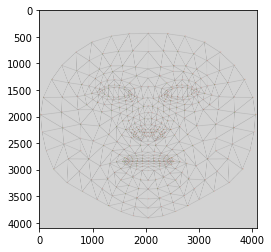

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt

# Read
img = io.imread('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/indeks facial landmarks media pipe.png')

fig = plt.imshow(img)
plt.show()

In [ ]:
!pip install MediaPipe==0.8.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Created by MediaPipe
#Modified by Augmented Startups 2021
#Face Mesh Landmarks in 5 Minutes
#Watch 5 Minute Tutorial at www.augmentedstartups.info/YouTube
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
import time

# For static images:
drawing_spec=mp_drawing.DrawingSpec(thickness=10, circle_radius=5)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:

    image = cv2.imread('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/38.mp4/1.mp4/frame0.jpg')  #Insert your Image Here
    # image = cv2.rotate(image, rotateCode = cv2.ROTATE_90_CLOCKWISE)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not results.multi_face_landmarks:
        print("Continue")
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)

    cv2.imwrite(r'/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba2/mesh.png', annotated_image)

In [ ]:
dir(results.multi_face_landmarks[0])

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_extensions_by_name',
 '_extensions_by_number',
 'landmark']

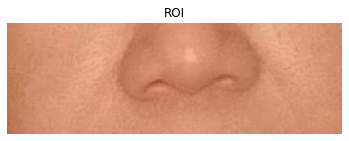

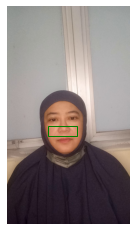

False

In [ ]:
#starting point in index 118 or 117 to 347 or 448 (horizontally) and 207 or 216 (vertically)
used_landmark = [117, 118, 207, 216, 346, 347]
x = results.multi_face_landmarks[0].landmark[117].x
y = results.multi_face_landmarks[0].landmark[117].y
w2 = results.multi_face_landmarks[0].landmark[448].x
h2 = results.multi_face_landmarks[0].landmark[207].y

shape = image.shape
relative_x = int(x * shape[1])
relative_w = int(w2 * shape[1]) - relative_x
relative_y = int(y * shape[0])
relative_h = int(h2 * shape[0]) - relative_y

# extract the ROI of the face region as a separate image
roi = image[relative_y:relative_y +relative_h, relative_x:relative_x + relative_w]
# roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)

plt_imshow("ROI", roi)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# create the shape
kotak = plt.Rectangle((relative_x, relative_y), relative_w, relative_h, fill=False, color='green')
# draw the box
# get the context for drawing boxes
ax = plt.gca()
ax.add_patch(kotak)
plt.grid(False)
plt.axis("off")
plt.show()

cv2.imwrite(r'/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/roi_coba2.png', roi)

#Pixel Average

**PILLOW**

In [ ]:
from PIL import Image

In [ ]:
def average_pixel_calculation(gambar):
  image = Image.open(gambar)
  width, height = image.size
  sum_pixel_r = 0
  sum_pixel_g = 0
  sum_pixel_b = 0
  for i in range(width):
    for j in range(height):
      r, g, b = image.getpixel((i, j))
      sum_pixel_r = sum_pixel_r + r
      sum_pixel_g = sum_pixel_g + g
      sum_pixel_b = sum_pixel_b + b

  average_pixel_r = sum_pixel_r/(width * height)
  average_pixel_g = sum_pixel_g/(width * height)
  average_pixel_b = sum_pixel_b/(width * height)
  return [average_pixel_r, average_pixel_g, average_pixel_b]

In [ ]:
# [r, g, b] = average_pixel_calculation('/content/drive/MyDrive/Riset/IPPG dan Blood Glucose/Data Coba2/roi_coba2.png')
# print([r, g, b])

**CV2**

In [ ]:
import cv2

def mean_pixel_calculation(gambar):
  img = cv2.imread(gambar)
  h, w, c = img.shape #height, width, channnel

  #Initialize
  l=0
  b_ave=0; g_ave=0; r_ave=0

  for i in range(h):
      for j in range(w):
          #Pixel value[0,0,0]（Black）を除外してピクセルの和とbgrのPixel valueの合計を計算する
          # if(img[i,j,0] != 0 or img[i,j,1] != 0 or img[i,j,2] != 0 ):
          l+=1    #Calculate the number of pixels of interest
              #Calculate the sum of the pixel values of the target pixel
          b_ave=b_ave+img[i,j,0]
          g_ave=g_ave+img[i,j,1]
          r_ave=r_ave+img[i,j,2]

  #Obtain the average RGB pixel value by dividing the total pixel value by the number of pixels.
  b_ave=b_ave/l
  g_ave=g_ave/l
  r_ave=r_ave/l
  return [r_ave, g_ave, b_ave]

In [ ]:
# [r, g, b] = mean_pixel_calculation('/content/drive/MyDrive/Riset/IPPG dan Blood Glucose/Data Coba2/roi_coba2.png')
# print([r, g, b])

#IPPG Signal Extraction

In [ ]:
!pip install MediaPipe==0.8.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.1 MB 409 kB/s 


In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [ ]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
def generate_facial_landmark(image):
  # For static images:
  drawing_spec=mp_drawing.DrawingSpec(thickness=10, circle_radius=5)
  with mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=1,
      min_detection_confidence=0.5) as face_mesh:

      # Convert the BGR image to RGB before processing.
      results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if not results.multi_face_landmarks:
          print("Continue")
      annotated_image = image.copy()
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACE_CONNECTIONS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec)
      
      return image, results

In [ ]:
def generate_specific_roi(image, hasil):
  #starting point in index 118 or 117 to 347 or 448 (horizontally) and 207 or 216 (vertically)
  used_landmark = [117, 118, 207, 216, 346, 347]
  x = hasil.multi_face_landmarks[0].landmark[117].x
  y = hasil.multi_face_landmarks[0].landmark[117].y
  w2 = hasil.multi_face_landmarks[0].landmark[448].x
  h2 = hasil.multi_face_landmarks[0].landmark[207].y

  shape = image.shape
  relative_x = int(x * shape[1])
  relative_w = int(w2 * shape[1]) - relative_x
  relative_y = int(y * shape[0])
  relative_h = int(h2 * shape[0]) - relative_y

  # print(relative_x)
  # print(relative_w)
  # print(relative_y)
  # print(relative_h)

  # miring = False
  # if relative_w < 250 or relative_h < 80:
  #   miring = True

  # extract the ROI of the face region as a separate image
  roi = image[relative_y:relative_y +relative_h, relative_x:relative_x + relative_w]
  # plt_imshow("ROI", roi)
  # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # # create the shape
  # kotak = plt.Rectangle((relative_x, relative_y), relative_w, relative_h, fill=False, color='green')
  # # draw the box
  # # get the context for drawing boxes
  # ax = plt.gca()
  # ax.add_patch(kotak)
  # plt.grid(False)
  # plt.show()
  
  cv2.imwrite('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/temp.png', roi)

  path_roi = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/temp.png'

  return path_roi

In [ ]:
# def IPPG_Signal_Extraction(path_video, path_simpan):
#   cap= cv2.VideoCapture(path_video)
#   i=0
#   r_signal = []
#   g_signal = []
#   b_signal = []
#   while(cap.isOpened()):
#       ret, frame = cap.read()
#       frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
#       if ret == False:
#           break
#       cv2.imwrite("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'),frame)
#       image, results = generate_facial_landmark(frame)
#       path_roi = generate_specific_roi(image, results)
#       [r, g, b] = mean_pixel_calculation(path_roi)
#       r_signal.append(r)
#       g_signal.append(g)
#       b_signal.append(b)
#       i+=1
  
#   cap.release()
#   cv2.destroyAllWindows()

#   return r_signal, g_signal, b_signal

In [ ]:
def IPPG_Signal_Extraction(path_video, path_simpan):
  cap= cv2.VideoCapture(path_video)
  i = 0
  r_signal = []
  g_signal = []
  b_signal = []
  while(cap.isOpened()):
      ret, frame = cap.read()
      frame = cv2.rotate(frame, cv2.ROTATE_180)
      if ret == False:
          break
      cv2.imwrite("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'),frame)
      i = i + 1
  
  cap.release()
  cv2.destroyAllWindows()
  print("Selesai merubah video ke gambar")

  for frame in os.listdir(path_simpan):
      path = "{}/{}".format(path_simpan, frame)
      # print(path)
      gambar = cv2.imread(path)
      image, results = generate_facial_landmark(gambar)
      path_roi = generate_specific_roi(image, results)
      [r, g, b] = mean_pixel_calculation(path_roi)
      r_signal.append(r)
      g_signal.append(g)
      b_signal.append(b)
  print("Selesai ekstraksi sinyal IPPG")

  return r_signal, g_signal, b_signal

# def IPPG_Signal_Extraction(path_simpan):
#   r_signal = []
#   g_signal = []
#   b_signal = []
#   for frame in os.listdir(path_simpan):
#       path = "{}/{}".format(path_simpan, frame)
#       print(path)
#       gambar = cv2.imread(path)
#       image, results = generate_facial_landmark(gambar)
#       path_roi = generate_specific_roi(image, results)
#       [r, g, b] = mean_pixel_calculation(path_roi)
#       r_signal.append(r)
#       g_signal.append(g)
#       b_signal.append(b)
#   print("Selesai ekstraksi sinyal IPPG")

#   return r_signal, g_signal, b_signal

In [ ]:
def video_to_frame(path_video, path_simpan):
  cap= cv2.VideoCapture(path_video)
  i = 0
  while(cap.isOpened()):
      ret, frame = cap.read()
      frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
      frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
      if ret == False:
          break
      cv2.imwrite("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'),frame)
      i = i + 1
  
  cap.release()
  cv2.destroyAllWindows()
  print("Selesai merubah video ke gambar")

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/Frame_20220705_083552.mp4'
path_video = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/20220705_083552.mp4'

In [ ]:
if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

In [ ]:
# r_signal, g_signal, b_signal = IPPG_Signal_Extraction(path_video, path_simpan)

In [ ]:
# print(r_signal)
# print(g_signal)
# print(b_signal)

In [ ]:
def plotSinyal(new_data, color, sr = 30):
  plt.style.use('seaborn-poster')
  %matplotlib inline
  # sampling interval
  N = len(new_data)
  T = 1/sr
  t = np.linspace(0.0, N*T, N, endpoint=False)

  plt.figure(figsize = (10, 4))
  plt.plot(t, new_data, color)
  plt.ylabel('Amplitude')
  plt.show()

In [ ]:
# plotSinyal(r_signal, 'r')
# plotSinyal(g_signal, 'g')
# plotSinyal(b_signal, 'b')

In [ ]:
#Normaslisasi sinyal
def normalized_signal(signal):
  new_signal = []
  for i in range(len(signal)):
    value = (signal[i] - min(signal)) / (max(signal) - min(signal))
    new_signal.append(value)
  return new_signal

#Standarisasi sinyal
def standardized_signal(signal):
  mean = sum(signal) / len(signal)
  standard_deviation = math.sqrt( sum( (x - mean)^2 ) / len(signal))
  new_signal = []
  for i in range(len(signal)):
    value = (signal[i] - mean) / standard_deviation
    new_signal.append(value)
  return new_signal

#Perbandingan sinyal raw 4 kelompok

**KELOMPOK 1**

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/Frame_20220705_083552.mp4'
path_video = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/20220705_083552.mp4'

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

Selesai merubah video ke gambar
Selesai ekstraksi sinyal IPPG


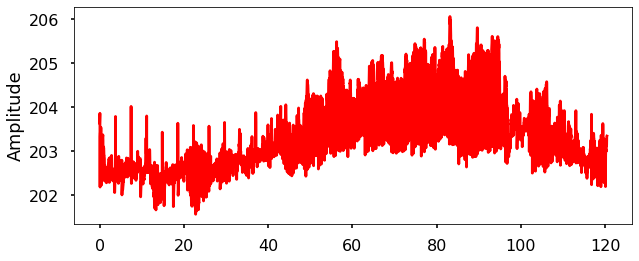

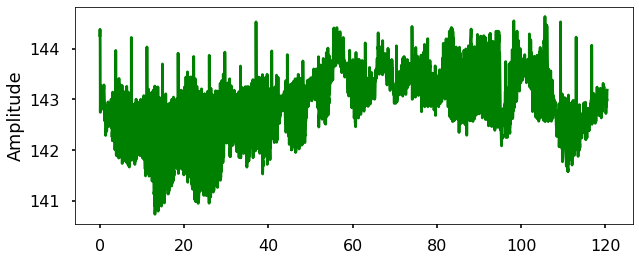

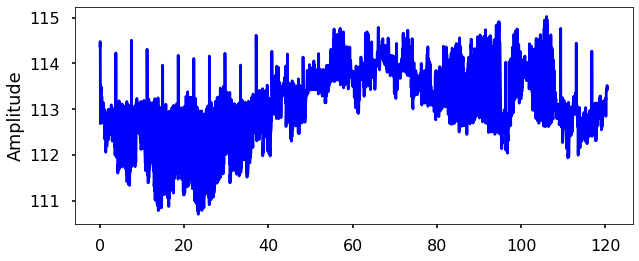

In [ ]:
r_signal, g_signal, b_signal = IPPG_Signal_Extraction(path_video, path_simpan)

plotSinyal(r_signal, 'r')
plotSinyal(g_signal, 'g')
plotSinyal(b_signal, 'b')

**KELOMPOK 2**

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning/Frame_20220705_083822.mp4'
path_video = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning/20220705_083822.mp4'

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

Selesai merubah video ke gambar
Selesai ekstraksi sinyal IPPG


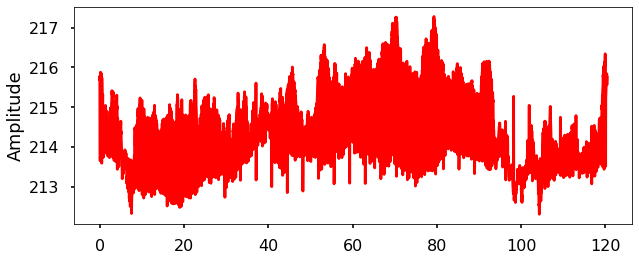

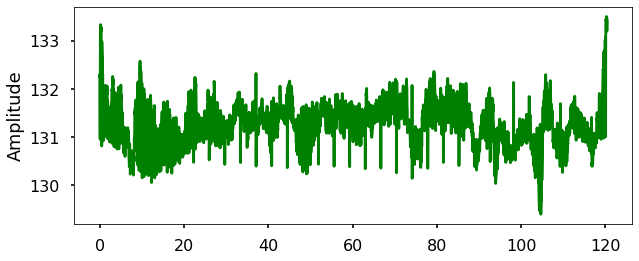

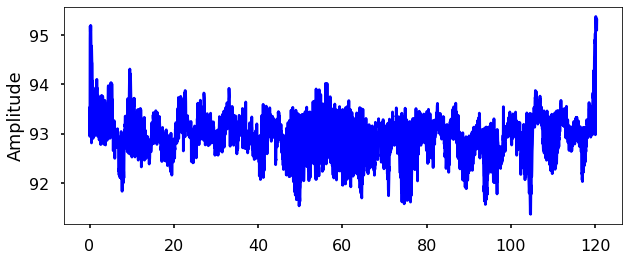

In [ ]:
r2_signal, g2_signal, b2_signal = IPPG_Signal_Extraction(path_video, path_simpan)

plotSinyal(r2_signal, 'r')
plotSinyal(g2_signal, 'g')
plotSinyal(b2_signal, 'b')

**KELOMPOK 3**

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/51.mp4/1.mp4'
path_video = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/Video/51.mp4/1.mp4'

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

Selesai merubah video ke gambar
Selesai ekstraksi sinyal IPPG


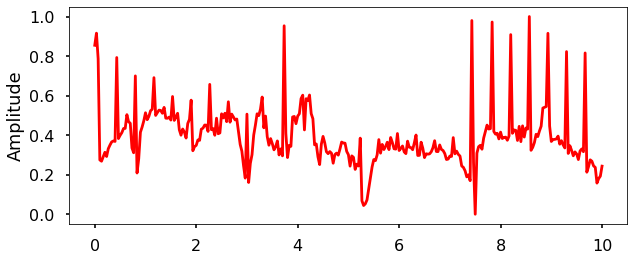

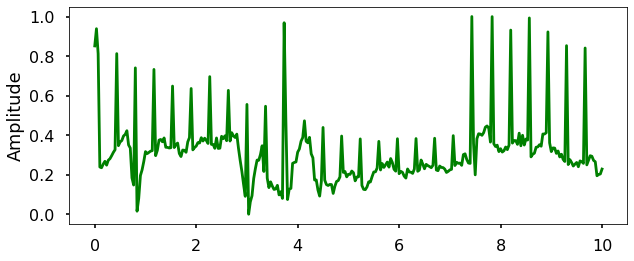

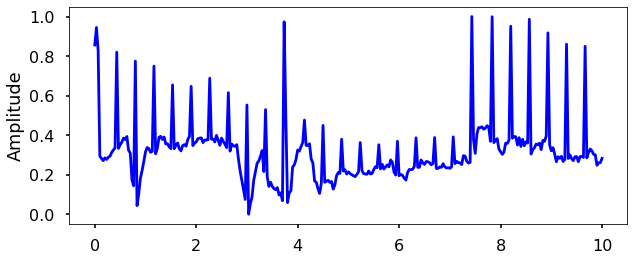

In [ ]:
r2_signal, g2_signal, b2_signal = IPPG_Signal_Extraction(path_video, path_simpan)
norm_r2 = normalized_signal(r2_signal)
norm_g2 = normalized_signal(g2_signal)
norm_b2 = normalized_signal(b2_signal)

plotSinyal(norm_r2, 'r')
plotSinyal(norm_g2, 'g')
plotSinyal(norm_b2, 'b')

**KELOMPOK 4**

Selesai merubah video ke gambar
Selesai ekstraksi sinyal IPPG


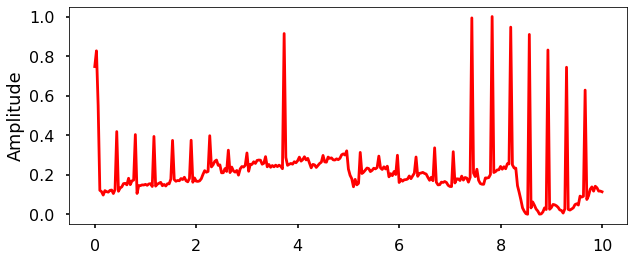

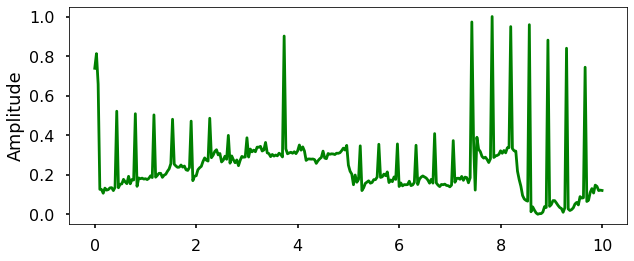

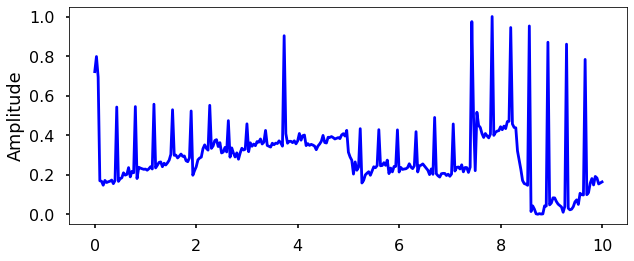

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/45.mp4/1.mp4'
path_video = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/Video/45.mp4/1.mp4'

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

r3_signal, g3_signal, b3_signal = IPPG_Signal_Extraction(path_video, path_simpan)
norm_r3 = normalized_signal(r3_signal)
norm_g3 = normalized_signal(g3_signal)
norm_b3 = normalized_signal(b3_signal)

plotSinyal(norm_r3, 'r')
plotSinyal(norm_g3, 'g')
plotSinyal(norm_b3, 'b')

**KELOMPOK 5**

Selesai merubah video ke gambar
Selesai ekstraksi sinyal IPPG


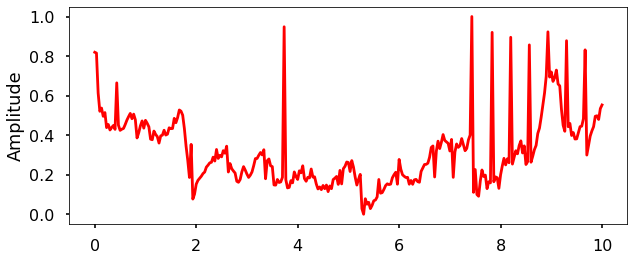

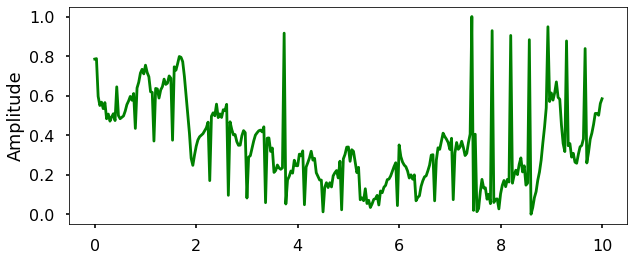

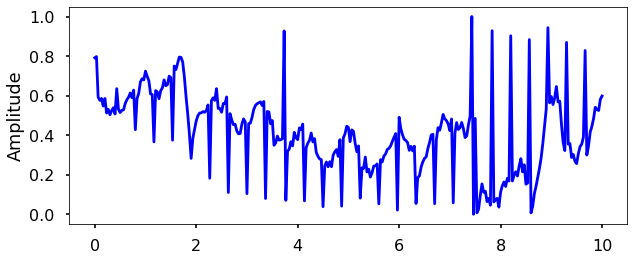

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/32.mp4/1.mp4'
path_video = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/Video/32.mp4/1.mp4'

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

r5_signal, g5_signal, b5_signal = IPPG_Signal_Extraction(path_video, path_simpan)
norm_r5 = normalized_signal(r5_signal)
norm_g5 = normalized_signal(g5_signal)
norm_b5 = normalized_signal(b5_signal)

plotSinyal(norm_r5, 'r')
plotSinyal(norm_g5, 'g')
plotSinyal(norm_b5, 'b')

**KELOMPOK 6**

Selesai merubah video ke gambar
Selesai ekstraksi sinyal IPPG


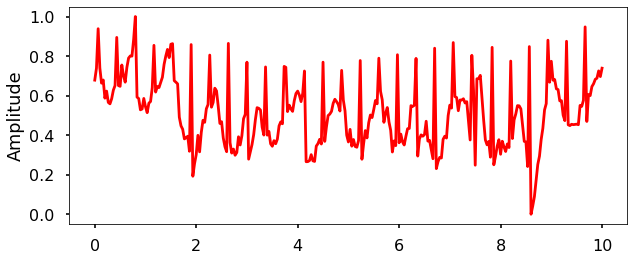

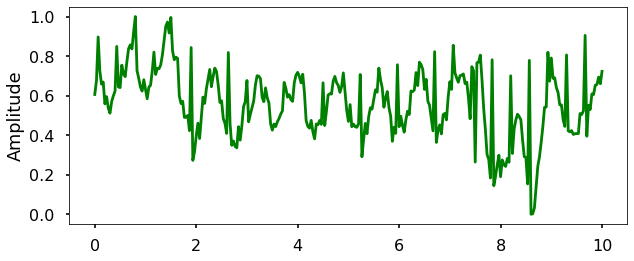

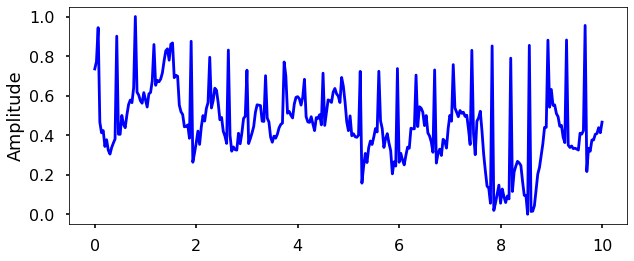

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/38.mp4/1.mp4'
path_video = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/Video/38.mp4/1.mp4'

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

r4_signal, g4_signal, b4_signal = IPPG_Signal_Extraction(path_video, path_simpan)
norm_r4 = normalized_signal(r4_signal)
norm_g4 = normalized_signal(g4_signal)
norm_b4 = normalized_signal(b4_signal)

plotSinyal(norm_r4, 'r')
plotSinyal(norm_g4, 'g')
plotSinyal(norm_b4, 'b')

Selesai merubah video ke gambar
Selesai ekstraksi sinyal IPPG


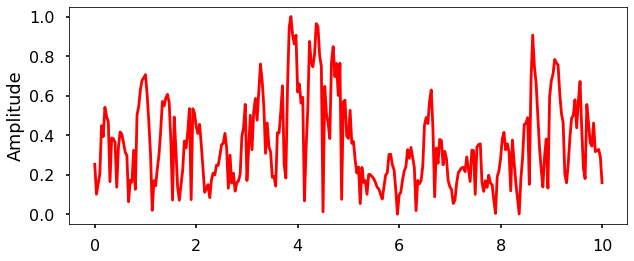

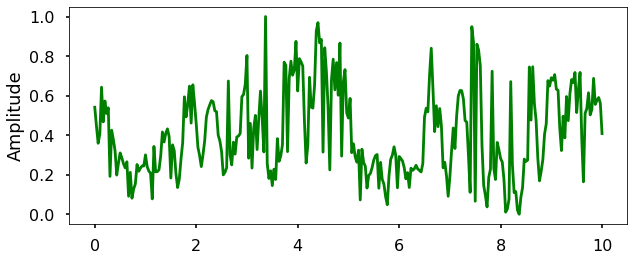

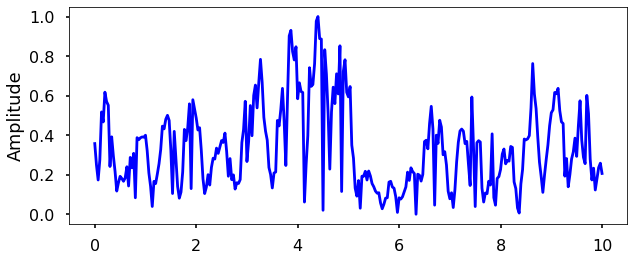

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/38.mp4/1.mp4'
path_video = '/content/out_3.avi'

if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)

r7_signal, g7_signal, b7_signal = IPPG_Signal_Extraction(path_video, path_simpan)
norm_r7 = normalized_signal(r7_signal)
norm_g7 = normalized_signal(g7_signal)
norm_b7 = normalized_signal(b7_signal)

plotSinyal(norm_r7, 'r')
plotSinyal(norm_g7, 'g')
plotSinyal(norm_b7, 'b')

In [ ]:
from IPython.lib.display import exists
import imageio
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import cv2
import imageio
import os

image_folder = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/38.mp4/1.mp4'
gambar = [img for img in os.listdir(image_folder)]
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/38.mp4_1.mp4'
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan'
path_simpan_gambar = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/lightness/38.mp4_1.mp4'

if not os.path.exists(path_simpan_gambar):
    os.makedirs(path_simpan_gambar)

for image in gambar:
  pic = imageio.imread("{}/{}".format(image_folder, image))
  color_4 = lambda rgb: np.maximum(np.maximum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
  color_4 = color_4(pic)
  color_5 = lambda rgb: np.minimum(np.minimum(rgb[..., 0], rgb[..., 1]), rgb[..., 2])
  color_5 = color_5(pic)
  color_6 = (color_4.astype(int) + color_5.astype(int))/2
  imageio.imwrite("{}/{}".format(path_simpan_gambar, image), color_6.astype(int))

gambar = [img for img in os.listdir(path_simpan_gambar)]

for image in gambar:
  lama = cv2.imread("{}/{}".format(path_simpan_gambar, image))
  baru = cv2.applyColorMap(lama, cv2.COLORMAP_JET)
  cv2.imwrite("{}/{}".format(path_simpan_gambar, image), baru)

frame = cv2.imread(os.path.join(path_simpan_gambar, gambar[0]))
print(os.path.join(image_folder, gambar[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in gambar:
  video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/38.mp4/1.mp4/frame0.jpg


In [ ]:
def write_video(file_path, frames, fps):
    """
    Writes frames to an mp4 video file
    :param file_path: Path to output video, must end with .mp4
    :param frames: List of PIL.Image objects
    :param fps: Desired frame rate
    """

    w, h = frames[0].size
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    writer = cv2.VideoWriter(file_path, fourcc, fps, (w, h))

    for frame in frames:
        open_cv_image = np.array(frame) 
        writer.write(open_cv_image)

    writer.release() 

In [ ]:
from PIL import Image

file_path = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/38_1.avi'
frames = [Image.open("{}/{}".format(path_simpan_gambar, img)) for img in sorted(os.listdir(path_simpan_gambar))]
fps = 30

write_video(file_path, frames, fps)

**KELOMPOK LAIN**

In [ ]:
# import cv2
# import os

# path_umum = '/content/drive/MyDrive/Riset/IPPG dan Blood Glucose/Data Coba2'
# path_khusus = 'Cahaya Lampu Pijar 5 Skala/5 watt/Frame'
# path_simpan = "{}/{}".format(path_umum,path_khusus)

# # Opens the Video file
# i = 1
# for video in os.listdir('/content/drive/MyDrive/Riset/IPPG dan Blood Glucose/Data Coba2/Cahaya Lampu Pijar 5 Skala/5 watt'):
#   if video != 'Frame':
#     file_video = "{}/{}".format('/content/drive/MyDrive/Riset/IPPG dan Blood Glucose/Data Coba2/Cahaya Lampu Pijar 5 Skala/5 watt', video)
#     path_simpan_skala = "{}/{}".format(path_simpan, video)

#     r_signal, g_signal, b_signal = IPPG_Signal_Extraction(file_video, path_simpan_skala)

#     print('Kelompok ', i)

#     plotSinyal(r_signal, 'r')
#     plotSinyal(g_signal, 'g')
#     plotSinyal(b_signal, 'b')

#     i += 1

***SESUAI DENGAN PENELITIAN RONG & LI (2021), WARNA HIJAU MENUNJUKKAN SINYAL YANG LEBIH BERKORESPONDENSI DENGAN HEMOGLOBIN. SELAIN ITU, SINYAL RAW SANGAT BERPENGARUH DENGAN ARAH DAN INTENSITAS CAHAYA. SELAIN ITU, GERAKAN JUGA SANGAN MEMPENGARUHI INTENSITAS PANTULAN CAHAYA.***

#Penggunaan EVM untuk *video enhancement*

In [ ]:
# !git clone https://github.com/flyingzhao/PyEVM.git
# %pycat /content/PyEVM/EVM.py

In [ ]:
import cv2
import numpy as np
import scipy.signal as signal
import scipy.fftpack as fftpack
import os
import gc

In [ ]:
def magnify_color(video_name,low,high, path_simpan, levels=3,amplification=5):
    #Load Video and Generate Gaussian Video
    cap=cv2.VideoCapture(video_name)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width, height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    print("frame: ", frame_count)
    print("Width: ", width)
    print("Height: ", height)
    print("FPS: ", fps)
    x = 0
    for i in range(0, len(os.listdir(path_simpan))):
        s =cv2.imread("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'))
        # s = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        pyr=[s]
        for k in range(levels):
            s=cv2.pyrDown(s)
            pyr.append(s)
        gaussian_frame=pyr[-1]
        if x==0:
            # vid_data=np.zeros((frame_count,gaussian_frame.shape[0],gaussian_frame.shape[1],3))
            vid_data=[[[[0]*3]*gaussian_frame.shape[1]]*gaussian_frame.shape[0]]*frame_count
            x += 1
        vid_data[x]=gaussian_frame
    print("Selesai Load Video dan Membuat Video Gaussian")

    del s, gaussian_frame, pyr
    # gc.collect()

    #Temporal Filtering
    fft=fftpack.fft(vid_data,axis=0)
    frequencies = fftpack.fftfreq(frame_count, d=1.0 / fps)
    bound_low = (np.abs(frequencies - low)).argmin()
    bound_high = (np.abs(frequencies - high)).argmin()
    fft[:bound_low] = 0
    fft[bound_high:-bound_high] = 0
    fft[-bound_low:] = 0
    iff=fftpack.ifft(fft, axis=0)
    print("Selesai Melakukan Temporal Filtering")

    del vid_data, fft, frequencies, bound_low, bound_high
    # gc.collect()

    #Amplifying Video
    amp_video = np.abs(iff)*amplification
    print("Selesai Amplifikasi Video")

    del iff, amplification
    # # gc.collect()

    #Reconstruct Video
    # final_video=np.zeros((frame_count,width,height,3),dtype='float')
    final_video=[[[[0.0]*3]*height]*width]*frame_count
    for i in range(0,frame_count):
        img = amp_video[i]
        for x in range(levels):
            img=cv2.pyrUp(img)
        image = cv2.imread("{}/{}".format(path_simpan,'frame'+str(i)+'.jpg'))
        img=img+image
        final_video[i]=img
    print("Selesai Rekonstruksi Video")

    del amp_video, image, img
    # gc.collect()

    #Saving Video
    fourcc = cv2.VideoWriter_fourcc('X','V','I','D')
    # [height,width]=final_video[0].shape[0:2]
    writer = cv2.VideoWriter("out.mp4", fourcc, 30, (width, height), 1)
    for i in range(0,len(final_video[0][0][0])):
        writer.write(cv2.convertScaleAbs(final_video[i]))
    writer.release()
    print("Selesai Menyimpan Video")

In [ ]:
path_simpan = '/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Coba2'
video_name = "/content/drive/MyDrive/Riset/IPPG_dan_Blood_Glucose/Data Coba2/Coba2.mp4"

In [ ]:
magnify_color(video_name,0.5,4, path_simpan)
# magnify_motion("baby.mp4",0.4,3)

frame:  170
Width:  1920
Height:  1080
FPS:  30
Selesai Load Video dan Membuat Video Gaussian
Selesai Melakukan Temporal Filtering
Selesai Amplifikasi Video
Selesai Rekonstruksi Video
Selesai Menyimpan Video


In [ ]:
array_a = np.zeros((2,3,4,2))
list_a = [[[[0]*2]*4]*3]*2
print(array_a)
print(list_a)
print(array_a[0])
print(list_a[0])

In [ ]:
img = cv2.imread('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/frame/38.mp4/1.mp4/frame0.jpg')

In [ ]:
!git clone https://github.com/flyingzhao/PyEVM.git

Cloning into 'PyEVM'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 112 (delta 27), reused 27 (delta 27), pack-reused 83
Receiving objects: 100% (112/112), 111.06 MiB | 34.53 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
import cv2
print(cv2.__version__)

4.6.0


In [ ]:
import cv2
import numpy as np
import scipy.signal as signal
import scipy.fftpack as fftpack


#convert RBG to YIQ
def rgb2ntsc(src):
    [rows,cols]=src.shape[:2]
    dst=np.zeros((rows,cols,3),dtype=np.float64)
    T = np.array([[0.114, 0.587, 0.298], [-0.321, -0.275, 0.596], [0.311, -0.528, 0.212]])
    for i in range(rows):
        for j in range(cols):
            dst[i, j]=np.dot(T,src[i,j])
    return dst

#convert YIQ to RBG
def ntsc2rbg(src):
    [rows, cols] = src.shape[:2]
    dst=np.zeros((rows,cols,3),dtype=np.float64)
    T = np.array([[1, -1.108, 1.705], [1, -0.272, -0.647], [1, 0.956, 0.620]])
    for i in range(rows):
        for j in range(cols):
            dst[i, j]=np.dot(T,src[i,j])
    return dst

#Build Gaussian Pyramid
def build_gaussian_pyramid(src,level=3):
    s=src.copy()
    pyramid=[s]
    for i in range(level):
        s=cv2.pyrDown(s)
        pyramid.append(s)
    return pyramid

#Build Laplacian Pyramid
def build_laplacian_pyramid(src,levels=3):
    gaussianPyramid = build_gaussian_pyramid(src, levels)
    pyramid=[]
    for i in range(levels,0,-1):
        GE=cv2.pyrUp(gaussianPyramid[i])
        L=cv2.subtract(gaussianPyramid[i-1],GE)
        pyramid.append(L)
    return pyramid

#load video from file
def load_video(video_filename):
    cap=cv2.VideoCapture(video_filename)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width, height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    video_tensor=np.zeros((frame_count,height,width,3),dtype='float')
    x=0
    while cap.isOpened():
        ret,frame=cap.read()
        if ret is True:
            video_tensor[x]=frame
            x+=1
        else:
            break
    return video_tensor,fps

# apply temporal ideal bandpass filter to gaussian video
def temporal_ideal_filter(tensor,low,high,fps,axis=0):
    fft=fftpack.fft(tensor,axis=axis)
    frequencies = fftpack.fftfreq(tensor.shape[0], d=1.0 / fps)
    bound_low = (np.abs(frequencies - low)).argmin()
    bound_high = (np.abs(frequencies - high)).argmin()
    fft[:bound_low] = 0
    fft[bound_high:-bound_high] = 0
    fft[-bound_low:] = 0
    iff=fftpack.ifft(fft, axis=axis)
    return np.abs(iff)

# build gaussian pyramid for video
def gaussian_video(video_tensor,levels=3):
    for i in range(0,video_tensor.shape[0]):
        frame=video_tensor[i]
        pyr=build_gaussian_pyramid(frame,level=levels)
        gaussian_frame=pyr[-1]
        if i==0:
            vid_data=np.zeros((video_tensor.shape[0],gaussian_frame.shape[0],gaussian_frame.shape[1],3))
        vid_data[i]=gaussian_frame
    return vid_data

#amplify the video
def amplify_video(gaussian_vid,amplification=50):
    return gaussian_vid*amplification

#reconstract video from original video and gaussian video
def reconstract_video(amp_video,origin_video,levels=3):
    final_video=np.zeros(origin_video.shape)
    for i in range(0,amp_video.shape[0]):
        img = amp_video[i]
        for x in range(levels):
            img=cv2.pyrUp(img)
        img=img+origin_video[i]
        final_video[i]=img
    return final_video

#save video to files
def save_video(video_tensor):
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    [height,width]=video_tensor[0].shape[0:2]
    writer = cv2.VideoWriter("out.avi", fourcc, 30, (width, height), 1)
    for i in range(0,video_tensor.shape[0]):
        writer.write(cv2.convertScaleAbs(video_tensor[i]))
    writer.release()

#magnify color
def magnify_color(video_name,low,high,levels=3,amplification=20):
    t,f=load_video(video_name)
    gau_video=gaussian_video(t,levels=levels)
    filtered_tensor=temporal_ideal_filter(gau_video,low,high,f)
    amplified_video=amplify_video(filtered_tensor,amplification=amplification)
    final=reconstract_video(amplified_video,t,levels=3)
    save_video(final)

#build laplacian pyramid for video
def laplacian_video(video_tensor,levels=3):
    tensor_list=[]
    for i in range(0,video_tensor.shape[0]):
        frame=video_tensor[i]
        pyr=build_laplacian_pyramid(frame,levels=levels)
        if i==0:
            for k in range(levels):
                tensor_list.append(np.zeros((video_tensor.shape[0],pyr[k].shape[0],pyr[k].shape[1],3)))
        for n in range(levels):
            tensor_list[n][i] = pyr[n]
    return tensor_list

#butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    omega = 0.5 * fs
    low = lowcut / omega
    high = highcut / omega
    b, a = signal.butter(order, [low, high], btype='band')
    y = signal.lfilter(b, a, data, axis=0)
    return y

#reconstract video from laplacian pyramid
def reconstract_from_tensorlist(filter_tensor_list,levels=3):
    final=np.zeros(filter_tensor_list[-1].shape)
    for i in range(filter_tensor_list[0].shape[0]):
        up = filter_tensor_list[0][i]
        for n in range(levels-1):
            up=cv2.pyrUp(up)+filter_tensor_list[n + 1][i]#可以改为up=cv2.pyrUp(up)
        final[i]=up
    return final

#manify motion
def magnify_motion(video_name,low,high,levels=3,amplification=20):
    t,f=load_video(video_name)
    lap_video_list=laplacian_video(t,levels=levels)
    filter_tensor_list=[]
    for i in range(levels):
        filter_tensor=butter_bandpass_filter(lap_video_list[i],low,high,f)
        filter_tensor*=amplification
        filter_tensor_list.append(filter_tensor)
    recon=reconstract_from_tensorlist(filter_tensor_list)
    final=t+recon
    save_video(final)

if __name__=="__main__":
    magnify_color("/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/Video/38.mp4/1.mp4",0.4,3)
    # magnify_motion("baby.mp4",0.4,3)

#Signal filtering

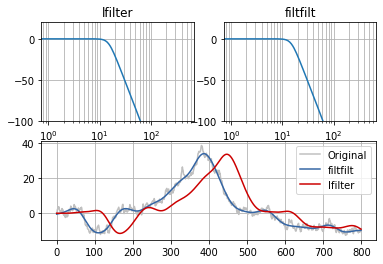

In [ ]:
from __future__ import division, print_function
import numpy as np
from numpy.random import randn
from numpy.fft import rfft
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.butter(4, 0.03, analog=False)

# Show that frequency response is the same
impulse = np.zeros(1000)
impulse[500] = 1

# Applies filter forward and backward in time
imp_ff = signal.filtfilt(b, a, impulse)

# Applies filter forward in time twice (for same frequency response)
imp_lf = signal.lfilter(b, a, signal.lfilter(b, a, impulse))

plt.subplot(2, 2, 1)
plt.semilogx(20*np.log10(np.abs(rfft(imp_lf))))
plt.ylim(-100, 20)
plt.grid(True, which='both')
plt.title('lfilter')

plt.subplot(2, 2, 2)
plt.semilogx(20*np.log10(np.abs(rfft(imp_ff))))
plt.ylim(-100, 20)
plt.grid(True, which='both')
plt.title('filtfilt')

sig = np.cumsum(randn(800))  # Brownian noise
sig_ff = signal.filtfilt(b, a, sig)
sig_lf = signal.lfilter(b, a, signal.lfilter(b, a, sig))
plt.subplot(2, 1, 2)
plt.plot(sig, color='silver', label='Original')
plt.plot(sig_ff, color='#3465a4', label='filtfilt')
plt.plot(sig_lf, color='#cc0000', label='lfilter')
plt.grid(True, which='both')
plt.legend(loc="best")

In [ ]:
LEVEL = 12
freq = 30
for i in range(1, LEVEL+1):
  freq_tengah = freq/2
  print("level: ", i)
  print("details: {}-{}".format(freq_tengah, freq))
  print("aproximation: {}-{}".format(0, freq_tengah))
  freq=freq_tengah

level:  1
details: 15.0-30
aproximation: 0-15.0
level:  2
details: 7.5-15.0
aproximation: 0-7.5
level:  3
details: 3.75-7.5
aproximation: 0-3.75
level:  4
details: 1.875-3.75
aproximation: 0-1.875
level:  5
details: 0.9375-1.875
aproximation: 0-0.9375
level:  6
details: 0.46875-0.9375
aproximation: 0-0.46875
level:  7
details: 0.234375-0.46875
aproximation: 0-0.234375
level:  8
details: 0.1171875-0.234375
aproximation: 0-0.1171875
level:  9
details: 0.05859375-0.1171875
aproximation: 0-0.05859375
level:  10
details: 0.029296875-0.05859375
aproximation: 0-0.029296875
level:  11
details: 0.0146484375-0.029296875
aproximation: 0-0.0146484375
level:  12
details: 0.00732421875-0.0146484375
aproximation: 0-0.00732421875


In [ ]:
import numpy as np
import pywt

In [ ]:
# pywt.wavelist()

In [ ]:
def filterDWT(signal, WAVELET, LEVEL):
  coeff = pywt.wavedec(signal, WAVELET, level=LEVEL)
  for i in range(6, LEVEL):
    coeff[-i] = np.zeros_like(coeff[-i])
  filtered_signal = pywt.waverec(coeff, WAVELET)
  filtered_signal = normalized_signal(filtered_signal)
  # print(coeff)
  return filtered_signal

In [ ]:
# plotSinyal(norm_g7, 'g')

# for i in range(6, 13):
#   filtered_signal = filterDWT(g7_signal, 'sym6', i)
#   print("Level: ", i)
#   plotSinyal(filtered_signal, 'g')

In [ ]:
# filtered_signal = filterDWT(g_signal, 'sym6', 12)
# plotSinyal(filtered_signal, 'g')
# filtered_signal = filterDWT(g2_signal, 'sym6', 12)
# plotSinyal(filtered_signal, 'g')
# filtered_signal = filterDWT(g3_signal, 'sym6', 12)
# plotSinyal(filtered_signal, 'g')
# filtered_signal = filterDWT(g4_signal, 'sym6', 12)
# plotSinyal(filtered_signal, 'g')

**USE FREQ 0.00732421875 TO 0.9375 INSTEAD OF 0.14 TO 0.75**

In [ ]:
# from scipy.fft import fft, fftfreq

# # N = int(sr * 54.6)
# N = len(filtered_signal)
# T = 1/30

# # Note the extra 'r' at the front
# yf = fft(filtered_signal)
# xf = fftfreq(N, T)[:N//2]
# # print(len(filtered_signal))
# # print(yf)

# plt.figure(figsize = (50, 4))
# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# plt.grid()
# plt.show()

In [ ]:
from scipy.signal import butter, filtfilt, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    # y = lfilter(b, a, signal.lfilter(b, a, data))
    return y

def plot_fft(new_data, N, T):
    yf = fft(new_data)
    xf = fftfreq(N, T)[:N//2]
    plt.figure(figsize = (50, 4))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.show()

In [ ]:
def filter(signal, lowcut, highcut, WAVELET ='sym6', LEVEL=12,  fs=30):
  # plotSinyal(signal, 'g')
  filtered_signal = filterDWT(signal, WAVELET, LEVEL)
  # plotSinyal(filtered_signal, 'g')
  for freq_low in lowcut:
    for freq_high in highcut:
      # plotSinyal(filtered_signal, 'g')
      # print("low= ", freq_low)
      # print("high= ", freq_high)
      y = butter_bandpass_filter(filtered_signal, freq_low, freq_high, fs)
      y = normalized_signal(y)
      balanced_signal = y - np.mean(y)
      plotSinyal(balanced_signal, 'g')
      # plot_fft(y, len(y), 1/30)
  return y

# filtered_signal = filter(g_signal, [0.667, 0.7, 0.833, 1], [1.5, 1.667, 2, 4])

**NORMAL HEART RATE IS 60 TO 100 BPM OR 40 TO 120 (CHANG, CHEN & LIU (2018)); RONG & LI (2021) USE 0.7 TO 4 HZ; RESTING HEART RATE IS 50 TO 90 (NANCHEN, 2018)**

In [ ]:
# filtered_signal = filter(g_signal, [0.5, 0.667, 0.7, 0.833, 1], [1.5, 1.667, 2, 4, 14.9])

In [ ]:
# Sesuai Jurnal = [1, 1.667], [0.667, 2], [0.7, 4], [0.833, 1.5]
# low_freq = 0.833
# high_freq = 1.5

# plotSinyal(g7_signal, 'b')
# filtered_signal = filter(g7_signal, [1], [1.667])
# filtered_signal = filter(g7_signal, [0.667], [2])
# filtered_signal = filter(g7_signal, [0.7], [4])
# filtered_signal = filter(g7_signal, [0.833], [1.5])

In [ ]:
# plotSinyal(g4_signal, 'b')
# filtered_signal = filter(g4_signal, [1], [1.667])
# filtered_signal = filter(g4_signal, [0.667], [2])
# filtered_signal = filter(g4_signal, [0.7], [4])
# filtered_signal = filter(g4_signal, [0.833], [1.5])

#Pemotongan Video

In [ ]:
!pip install imageio_ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 58.6 MB/s 


In [ ]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import os
import math

In [ ]:
def pemotongan_video(video_name, path_simpan, path_potong, panjang_video):
  if not os.path.exists(path_simpan):
      os.makedirs(path_simpan)
  video_to_frame(video_name, path_simpan)
  N = len(os.listdir(path_simpan))
  T = 1/30
  durasi_frame = N*T
  print("Durasi = {}".format(str(durasi_frame)))
  if (panjang_video >= durasi_frame) or ((durasi_frame / panjang_video) == 1):
    print("Panjang terlalu besar atau Tidak perlu dipotong")
  else:
    path_khusus = "Potongan/Video"
    base = os.path.basename(video_name)
    path_baru = "{}/{}/{}".format(path_potong, path_khusus, base)

    if not os.path.exists(path_baru):
      os.makedirs(path_baru)

    pengulangan = math.floor(durasi_frame / panjang_video)
    tambahan = durasi_frame % panjang_video
    print("Pengulangan = {}".format(str(pengulangan)))
    print("Tambahan = {}".format(str(tambahan)))
    for i in range(pengulangan):
      ffmpeg_extract_subclip(video_name, i*panjang_video, (i*panjang_video)+panjang_video, targetname="{}/{}.mp4".format(path_baru, i+1))
      # if i == 0:
      #   ffmpeg_extract_subclip(video_name, i*panjang_video, (i*panjang_video)+panjang_video, targetname="{}/{}.mp4".format(path_baru, i+1))
      # else:
      #   ffmpeg_extract_subclip(video_name, (i*panjang_video)-2, (i*panjang_video)+panjang_video, targetname="{}/{}.mp4".format(path_baru, i+1))

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/frame/28_2.mp4'
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/video_siap/28_2.mp4'
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi'
# pemotongan_video(video_name, path_simpan, path_potong, 10)

#Simpan sinyal potongan video ke csv

In [ ]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import os
import math
import pandas as pd
import numpy as np

In [ ]:
def simpanSinyal(video_name, path_frame, path_potong, panjang_video):
  # pemotongan_video(video_name, path_frame, path_potong, panjang_video)
  base = os.path.basename(video_name)
  path_khusus = "Potongan/Video/{}".format(base)
  path_video = "{}/{}".format(path_potong, path_khusus)
  path = "{}/{}".format(path_potong, "Potongan")
  sorted_list = sorted(os.listdir(path_video), key=lambda x: int(os.path.splitext(x)[0]))
  for files in sorted_list:
    path_file = os.path.join(path_video, files)
    path_simpan = "{}/Potongan/frame/{}/{}".format(path_potong, base, files)
    if not os.path.exists(path_simpan):
      os.makedirs(path_simpan)
    print(path_file)
    print(path_simpan)
    red, signal, blue = IPPG_Signal_Extraction(path_file, path_simpan)
    path_csv = os.path.join(path, "folder_csv_2")
    if not os.path.exists(path_csv):
      os.makedirs(path_csv)
    # if files == sorted_list[0]:
    #   filtered_signal = filter(signal, [1], [1.667])
    # else:
    #   filtered_signal = filter(signal, [1], [1.667])
    #   print(len(filtered_signal))
    #   filtered_signal = filtered_signal[30:]
    #   print(len(filtered_signal))
    filtered_signal = filter(signal, [0.833], [1.5])
    plotSinyal(filtered_signal, 'g')
    df = pd.DataFrame(filtered_signal)
    df.to_csv('{}/{}_{}.csv'.format(path_csv, base, files))

def simpanSinyalTanpaPotong(video_name, path_potong, files):
  base = os.path.basename(video_name)
  path = "{}/{}".format(path_potong, "Potongan")
  path_simpan = "{}/Potongan/frame/{}/{}".format(path_potong, base, files)
  if not os.path.exists(path_simpan):
    os.makedirs(path_simpan)
  print(video_name)
  red, signal, blue = IPPG_Signal_Extraction(video_name, path_simpan)
  path_csv = os.path.join(path, "folder_csv_2")
  if not os.path.exists(path_csv):
    os.makedirs(path_csv)
  filtered_signal = filter(signal, [0.833], [1.5])
  print(len(filtered_signal))
  plotSinyal(filtered_signal, 'g')
  df = pd.DataFrame(filtered_signal)
  df.to_csv('{}/{}_{}.csv'.format(path_csv, base, files))

# def simpanSinyal(video_name, path_frame, path_potong, indeks, low_freq, high_freq):
#   red, green, blue = IPPG_Signal_Extraction(path_frame)
#   filtered_signal = filter(green, low_freq, high_freq)
#   path = "{}/{}".format(path_potong, "Potongan")
#   i = 1
#   batas = indeks * 30
#   for index in range(0, len(filtered_signal), batas):
#     signal = filtered_signal[index:batas-1+index]
#     plotSinyal(signal, 'g')
#     path_csv = os.path.join(path, "folder_csv")
#     if not os.path.exists(path_csv):
#       os.makedirs(path_csv)
#     df = pd.DataFrame(signal)
#     df.to_csv('{}/{}.csv'.format(path_csv, i))
#     print("File {} created".format(i))
#     i = i + 1

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba2 15-06-2022/Coba2'
video_name = "/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/20220705_083552.mp4"
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba2 15-06-2022'

In [ ]:
# red, green, blue = IPPG_Signal_Extraction(video_name, path_simpan)
# filtered_signal = filter(green, [1], [1.667])
# simpanSinyal(video_name, path_simpan, path_potong, 10)

**KELOMPOK 1**

In [ ]:
path_khusus = "Potongan/Video"
path_baru = "{}/{}".format(path_potong, path_khusus)

# if not os.path.exists(path_baru):
#   os.makedirs(path_baru)

# ffmpeg_extract_subclip(video_name, 0, 30, targetname="{}/{}.mp4".format(path_baru, 1))

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/Frame_20220705_083552.mp4'
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/20220705_083552.mp4'
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih'

# simpanSinyal(video_name, path_simpan, path_potong, 30)

**KELOMPOK 2**

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning/Frame_20220705_083822.mp4'
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning/20220705_083822.mp4'
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning'

# simpanSinyal(video_name, path_simpan, path_potong, 10)

**KELOMPOK 3**

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Putih/Frame_20220705_084046.mp4'
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Putih/20220705_084046.mp4'
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Putih'

# simpanSinyal(video_name, path_simpan, path_potong, 10)

**KELOMPOK 4**

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/Frame_20220705_084332.mp4'
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/20220705_084332.mp4'
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih'

# simpanSinyal(video_name, path_simpan, path_potong, 10)

**KELOMPOK 5**

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning/Frame_20220705_084615.mp4'
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning/20220705_084615.mp4'
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning'

# simpanSinyal(video_name, path_simpan, path_potong, 10)

**KELOMPOK 6**

In [ ]:
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/frame/13_5.mp4'
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/video_siap/13_5.mp4'
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi'

# simpanSinyal(video_name, path_simpan, path_potong, 10)

In [ ]:
# Sesuai Jurnal = [1, 1.667], [0.667, 2], [0.7, 4], [0.833, 1.5]
path_simpan = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/Frame_20220705_083552.mp4'
video_name = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/20220705_083552.mp4'
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih'

# simpanSinyal(video_name, path_simpan, path_potong, 10, [1], [1.667])

#Plot sinyal dari csv

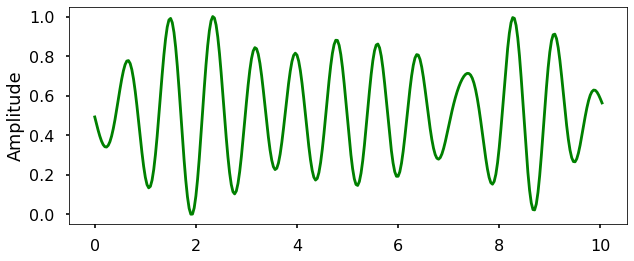

In [ ]:
import numpy as np
import pandas as pd
import statistics

df = pd.read_csv('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/folder_csv_2/38.mp4_1.mp4.csv')
signal = df.iloc[:,1:].values
plotSinyal(signal, 'g')

In [ ]:
def plot_from_csv(filepath):
  df = pd.read_csv(filepath)
  signal = df.iloc[:,1:].values
  # plotSinyal(signal, 'g')
  return signal

In [ ]:
# plot_from_csv('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/Potongan/folder_csv2/1.mp4.csv')

#Ekstraksi titik puncak dan lembah

In [ ]:
# thres = float(statistics.median(signal))
# step_1 = [0]*len(signal)
# for i in range(len(signal)):
#   if(signal[i] >= thres):
#     step_1[i] = 1 
#   else:
#     step_1[i] = 0
# N = len(step_1)
# T = 1/30
# t = np.linspace(0.0, N*T, N, endpoint=False)
# plt.plot(t ,step_1, 'g', linestyle='None', marker = 'o')

In [ ]:
# step_2 = [0]*len(signal)
# for i in range(len(signal)-1):
#   step_2[i] = step_1[i+1] - step_1[i]
# N = len(step_2)
# T = 1/30
# t = np.linspace(0.0, N*T, N, endpoint=False)
# plt.plot(t ,step_2, 'g', linestyle='None', marker = 'o')

In [ ]:
# T_min_1 = [0]
# for i in range(len(signal)-1):
#   if(step_2[i]==-1):
#     T_min_1.append(i)
# step_3 = [0]*(len(T_min_1)-1)
# T_maks = []
# for i in range(len(T_min_1)-1):
#   temp = []
#   temp_T = 0
#   temp_val = 0
#   for j in range(T_min_1[i], T_min_1[i+1]):
#     temp.append(signal[j])
#     if(signal[j] > temp_val):
#       temp_val = signal[j]
#       temp_T = j
#   step_3[i] = max(temp)
#   T_maks.append(temp_T)
# f, ax = plt.subplots()
# ax.plot(signal, 'g')
# for i in range(len(T_min_1)-1):
#   ax.plot(T_maks[i], step_3[i], 'o')
# plt.show()

In [ ]:
# T_max_1 = []
# for i in range(len(signal)-1):
#   if(step_2[i]==1):
#     T_max_1.append(i)
# T_max_1.append(len(signal))
# step_3 = [0]*(len(T_max_1)-1)
# T_maks = []
# for i in range(len(T_max_1)-1):
#   temp = []
#   temp_T = 0
#   temp_val = 1
#   for j in range(T_max_1[i], T_max_1[i+1]):
#     temp.append(signal[j])
#     if(signal[j] < temp_val):
#       temp_val = signal[j]
#       temp_T = j
#   step_3[i] = min(temp)
#   T_maks.append(temp_T)
# f, ax = plt.subplots()
# ax.plot(signal, 'g')
# for i in range(len(T_max_1)-1):
#   ax.plot(T_maks[i], step_3[i], 'o')
# plt.show()

In [ ]:
def findPeakValley(signal):
  # Step 1
  thres = float(statistics.median(signal))
  print(thres)
  step_1 = [0]*len(signal)
  for i in range(len(signal)):
    if(signal[i] >= thres):
      step_1[i] = 1 
    else:
      step_1[i] = 0
  # Step 2
  step_2 = [0]*len(signal)
  for i in range(len(signal)-1):
    step_2[i] = step_1[i+1] - step_1[i]
  # Step 3
  T_min_1 = [0]
  for i in range(len(signal)-1):
    if(step_2[i]==-1):
      T_min_1.append(i)
  step_3 = [0]*(len(T_min_1)-1)
  T_maks = []
  for i in range(len(T_min_1)-1):
    temp = []
    temp_T = 0
    temp_val = 0
    for j in range(T_min_1[i], T_min_1[i+1]):
      temp.append(signal[j])
      if(signal[j] > temp_val):
        temp_val = signal[j]
        temp_T = j
    step_3[i] = max(temp)
    T_maks.append(temp_T)
  # Step 4
  T_max_1 = []
  for i in range(len(signal)-1):
    if(step_2[i]==1):
      T_max_1.append(i)
  T_max_1.append(len(signal))
  step_4= [0]*(len(T_max_1)-1)
  T_min = []
  for i in range(len(T_max_1)-1):
    temp = []
    temp_T = 0
    temp_val = 1
    for j in range(T_max_1[i], T_max_1[i+1]):
      temp.append(signal[j])
      if(signal[j] < temp_val):
        temp_val = signal[j]
        temp_T = j
    step_4[i] = min(temp)
    T_min.append(temp_T)
  return T_maks, step_3, T_min, step_4

In [ ]:
def plotPeakValley(signal, T_maks, step_3, T_min, step_4):
  # sampling interval
  N = len(signal)
  T = 1/30
  t = np.linspace(0.0, N*T, N, endpoint=False)
  f, ax = plt.subplots()
  ax.plot(t, signal, 'g')
  for i in range(len(T_maks)):
    ax.plot(T_maks[i]/30, step_3[i], 'ro')
  for i in range(len(T_min)):
    ax.plot(T_min[i]/30, step_4[i], 'bo')
  plt.show()

In [ ]:
def findPeak(signal):
  thres = float(statistics.median(signal))
  step_1 = [0]*len(signal)
  for i in range(len(signal)):
    if(signal[i] >= thres):
      step_1[i] = 1 
    else:
      step_1[i] = 0
  # Step 2
  step_2 = [0]*len(signal)
  for i in range(len(signal)-1):
    step_2[i] = step_1[i+1] - step_1[i]
  # Step 3
  T_min_1 = [0]
  for i in range(len(signal)-1):
    if(step_2[i]==-1):
      T_min_1.append(i)
  step_3 = [0]*(len(T_min_1)-1)
  T_maks = []
  for i in range(len(T_min_1)-1):
    temp = []
    temp_T = 0
    temp_val = 0
    for j in range(T_min_1[i], T_min_1[i+1]):
      temp.append(signal[j])
      if(signal[j] > temp_val):
        temp_val = signal[j]
        temp_T = j
    step_3[i] = max(temp)
    T_maks.append(temp_T)

    return T_maks, step_3

0.512677848985506


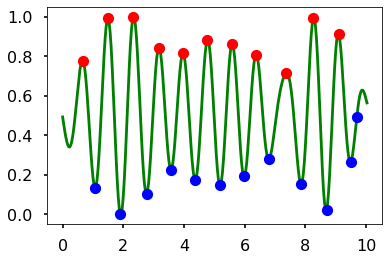

In [ ]:
T_maks, step_3, T_min, step_4 = findPeakValley(signal)
plotPeakValley(signal, T_maks, step_3, T_min, step_4)

# Cari Variabel untuk SQA

In [ ]:
from math import floor

In [ ]:
def variabelSQA(step_3, step_4):
  dv, dp, dpv = [], [], []
  for i in range(len(step_3)-1):
    dv.append(step_4[i+1] - step_4[i])
    dp.append(step_3[i+1] - step_3[i])
    dpv.append(step_3[i] - step_4[i])

  # P
  p_q3 = step_3[floor((len(step_3)+1)/4-1)]*0.25 + step_3[floor((len(step_3)+1)/4+1)]*0.75
  p_q1 = step_3[floor((len(step_3)+1)*3/4-1)]*0.25 + step_3[floor((len(step_3)+1)*3/4+1)]*0.75
  if(len(step_3)%2 == 0.0):
    p_q2 = (step_3[int(len(step_3)/2)]+step_3[int((len(step_3)+2)/2)])/2
  else:
    p_q2 = step_3[int((len(step_3)+1)/2)]/2
  p_q0 = p_q3 + 1.5*(p_q3 - p_q1)
  p_q4 = p_q1 - 1.5*(p_q3 - p_q1)
  hasil_p = [float(p_q0), float(p_q1), float(p_q2), float(p_q3), float(p_q4)]

  # Q
  q_q3 = step_4[floor((len(step_4)+1)/4-1)]*0.25 + step_4[floor((len(step_4)+1)/4+1)]*0.75
  q_q1 = step_4[floor((len(step_4)+1)*3/4-1)]*0.25 + step_4[floor((len(step_4)+1)*3/4+1)]*0.75
  if(len(step_4)%2 == 0.0):
    q_q2 = (step_4[int(len(step_4)/2)]+step_4[int((len(step_4)+2)/2)])/2
  else:
    q_q2 = step_4[int((len(step_4)+1)/2)]/2
  q_q0 = q_q3 + 1.5*(q_q3 - q_q1)
  q_q4 = q_q1 - 1.5*(q_q3 - q_q1)
  hasil_q = [float(q_q0), float(q_q1), float(q_q2), float(q_q3), float(q_q4)]

  # dV
  dv_q3 = dv[floor((len(dv)+1)/4-1)]*0.25 + dv[floor((len(dv)+1)/4+1)]*0.75
  dv_q1 = dv[floor((len(dv)+1)*3/4-1)]*0.25 + dv[floor((len(dv)+1)*3/4+1)]*0.75
  if(len(dv)%2 == 0.0):
    dv_q2 = (dv[int(len(dv)/2)]+dv[int((len(dv)+2)/2)])/2
  else:
    dv_q2 = dv[int((len(dv)+1)/2)]/2
  dv_q0 = dv_q3 + 1.5*(dv_q3 - dv_q1)
  dv_q4 = dv_q1 - 1.5*(dv_q3 - dv_q1)
  hasil_dv = [float(dv_q0), float(dv_q1), float(dv_q2), float(dv_q3), float(dv_q4)]

  # dP
  dp_q3 = dp[floor((len(dp)+1)/4-1)]*0.25 + dp[floor((len(dp)+1)/4+1)]*0.75
  dp_q1 = dp[floor((len(dp)+1)*3/4-1)]*0.25 + dp[floor((len(dp)+1)*3/4+1)]*0.75
  if(len(dp)%2 == 0.0):
    dp_q2 = (dp[int(len(dp)/2)]+dp[int((len(dp)+2)/2)])/2
  else:
    dp_q2 = dp[int((len(dp)+1)/2)]/2
  dp_q0 = dp_q3 + 1.5*(dp_q3 - dp_q1)
  dp_q4 = dp_q1 - 1.5*(dp_q3 - dp_q1)
  hasil_dp = [float(dp_q0), float(dp_q1), float(dp_q2), float(dp_q3), float(dp_q4)]

  # dPV
  dpv_q3 = dpv[floor((len(dpv)+1)/4-1)]*0.25 + dpv[floor((len(dpv)+1)/4+1)]*0.75
  dpv_q1 = dpv[floor((len(dpv)+1)*3/4-1)]*0.25 + dpv[floor((len(dpv)+1)*3/4+1)]*0.75
  if(len(dpv)%2 == 0.0):
    dpv_q2 = (dpv[int(len(dpv)/2)]+dpv[int((len(dpv)+2)/2)])/2
  else:
    dpv_q2 = dpv[int((len(dpv)+1)/2)]/2
  dpv_q0 = dpv_q3 + 1.5*(dpv_q3 - dpv_q1)
  dpv_q4 = dpv_q1 - 1.5*(dpv_q3 - dpv_q1)
  hasil_dpv = [float(dpv_q0), float(dpv_q1), float(dpv_q2), float(dpv_q3), float(dpv_q4)]

  return hasil_p, hasil_q, hasil_dv, hasil_dp, hasil_dpv

In [ ]:
hasil_p, hasil_q, hasil_dv, hasil_dp, hasil_dpv = variabelSQA(step_3, step_4)
print(hasil_p)
print(hasil_q)
print(hasil_dv)
print(hasil_dp)
print(hasil_dpv)

39 39 39
40 41
29
31
[0.8022221571620574, 0.7968581124154727, 0.7478912987822983, 0.7990037303141065, 0.7936396855675218]
[0.23434778271891984, 0.1006462988462158, 0.08014624719136705, 0.15412689239529742, 0.020425408522593377]
[0.06329280494838993, -0.046981923697601714, -0.0393637540935442, -0.002872032239205055, -0.1131467608851967]
[-0.02459248421759204, 0.057297341824793485, -0.0007397254687275256, 0.024541411407839275, 0.1064312374502248]
[0.63834725998954, 0.6492298898716552, 0.25480551084060166, 0.6448768379188091, 0.6557594678009243]


# Algoritma SQA

In [ ]:
def SQA(signal, fs = 30, win = 450, step = 30):
  while win > 5*fs:
    start = 0
    end = start + win
    sub = signal[start:end]
    while end < len(signal):
      T_maks, step_3, T_min, step_4 = findPeakValley(sub)
      hasil_p, hasil_q, hasil_dv, hasil_dp, hasil_dpv = variabelSQA(step_3, step_4)
      hasil = [hasil_p, hasil_q, hasil_dv, hasil_dp, hasil_dpv]
      flag = False
      for lists in hasil:
        for value in lists:
          if value > lists[-1]: 
            flag = True
      if flag:
        start = start + step
        end = end + win
      else:
        return sub
    win = win -1
  return []

In [ ]:
hasil = SQA(signal)
print(hasil)

# Segmentasi Sinyal

In [ ]:
path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Coba Puskesmas/Kuning Putih/Potongan'
path_segmentasi = "{}/{}".format(path_potong, "segmentasi")

# if not os.path.exists(path_segmentasi):
#   os.makedirs(path_segmentasi)

# nama_file = 1
# for i in range(len(step_4) - 1):
#   sum_peak = 0
#   for indeks in range(len(step_3) - 1):
#     if T_maks[indeks] in range(T_min[i], T_min[i+1]):
#       sum_peak = sum_peak + 1
#   if sum_peak == 1:
#     # print(nama_file)
#     signal_segmentasi = signal[T_min[i]: T_min[i+1]]
#     df = pd.DataFrame(signal_segmentasi)
#     df.to_csv("{}.csv".format(os.path.join(path_segmentasi, str(nama_file))))
#   nama_file = nama_file + 1

In [ ]:
# for file in os.listdir(path_segmentasi):
#   print(file)
#   _ = plot_from_csv("{}/{}".format(path_segmentasi, file))

In [ ]:
def segmentasi_sinyal(signal, step_3, T_maks, step_4, T_min, path_segmentasi):
  if not os.path.exists(path_segmentasi):
    os.makedirs(path_segmentasi)

  nama_file = 1
  for i in range(len(step_4) - 1):
    sum_peak = 0
    for indeks in range(len(step_3) - 1):
      if T_maks[indeks] in range(T_min[i], T_min[i+1]):
        sum_peak = sum_peak + 1
    if sum_peak == 1:
      signal_segmentasi = signal[T_min[i]: T_min[i+1]]
      df = pd.DataFrame(signal_segmentasi)
      df.to_csv("{}.csv".format(os.path.join(path_segmentasi, str(nama_file))))
      print(nama_file)
      # _ = plot_from_csv("{}.csv".format(os.path.join(path_segmentasi, str(nama_file))))
    nama_file = nama_file + 1

In [ ]:
# segmentasi_sinyal(signal, step_3, T_maks, step_4, T_min, path_segmentasi)

# Ekstraksi Fitur

In [ ]:
# df = pd.read_csv('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/segmentasi/1.mp4_1.mp4.csv/1.csv')
# signal = df.iloc[:,1:].values
# plotSinyal(signal, 'g')

In [ ]:
# T_maks, step_3 = findPeak(signal)
# plotPeakValley(signal, T_maks, step_3, [0, len(signal)-1], [signal[0], signal[-1]])

**Tinggi**

In [ ]:
# F1 = step_3
# F2 = (signal[0] + signal[-1])/2
# F3 = F1 - F2

In [ ]:
# print(F1)
# print(F2)
# print(F3)

**Waktu**

In [ ]:
# F4 = T_maks[0]/30 - 0
# F5 = ((len(signal)-1) - T_maks[0])/30
# F6 = F4 + F5
# F7 = F4 - F5
# F8 = F4 / F5

In [ ]:
# print(F4)
# print(F5)
# print(F6)
# print(F7)
# print(F8)

**Luas**

In [ ]:
from scipy import integrate

In [ ]:
N = len(signal)
T = 1/30
t = np.linspace(0.0, N*T, N, endpoint=False)

# F9 = integrate.simpson(np.transpose(signal[0:T_maks[0]+1]), t[0:T_maks[0]+1]) - signal[0]*F4
# F10 = integrate.simpson(np.transpose(signal[T_maks[0]:]), t[T_maks[0]:]) - signal[-1]*F5
# F11 = F9 + F10
# F12 = F9/F11
# F13 = F10/F11
# F14 = F9/F10

In [ ]:
# print(F9)
# print(F10)
# print(F11)
# print(F12)
# print(F13)
# print(F14)

**Slope**

In [ ]:
# F15 = (step_3[0][0] - signal[0][0])/(t[T_maks[0]+1] - t[0])
# F16 = (signal[-1][0] - step_3[0][0])/(t[-1] - t[T_maks[0]+1])

In [ ]:
# print(F15)
# print(F16)

**RBW dan DBW**

In [ ]:
# print(T_maks[0])
# print(x)
# print(y)
# print(0.75*step_3[0][0])
# print(F4)

In [ ]:
# # Interpolasi Lagrange

# # y = np.array(np.transpose(signal[0:T_maks[0]+1])[0])
# # x = np.array(t[0:T_maks[0]+1])

# y = np.array(np.transpose(signal[T_maks[0]:])[0])
# x = np.array(t[T_maks[0]:])

# # Python3 code for solving
# # inverse interpolation
 
# # Consider a structure
# # to keep each pair of
# # x and y together
# class Data:
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y
 
# # Function to calculate
# # the inverse interpolation
# def inv_interpolate(d: list, n: int,
#                     y: float) -> float:
 
#     # Initialize final x
#     x = 0
 
#     for i in range(n):
 
#         # Calculate each term
#         # of the given formula
#         xi = d[i].x
#         for j in range(n):
#             if j != i:
#                 xi = (xi * (y - d[j].y) /
#                       (d[i].y - d[j].y))
 
#         # Add term to final result
#         x += xi
#     return x

# d = []

# for i in range(len(x)):
#   d.append(Data(x[i], y[i]))

# n = len(d)

# val25 = 0.25 * step_3[0][0]
# val50 = 0.5 * step_3[0][0]
# val75 = 0.75 * step_3[0][0]

# print(F4)
# # print(inv_interpolate(d, n, val75))

# x1 = np.array([val25, val50, val75])
# y1 = np.array([inv_interpolate(d, n, val25), inv_interpolate(d, n, val50), inv_interpolate(d, n, val75)])

# print("Hasil dari beberapa tambahan nilai x adalah sebagai berikut:")
# print("y = " + str(val25) +" -->"+str(y1[0]))
# print("y = " + str(val50) +" -->"+str(y1[1]))
# print("y = " + str(val75) +" -->"+str(y1[2]))

In [ ]:
# # Interpolasi Lagrange

# y = np.array(np.transpose(signal[T_maks[0]:])[0])
# x = np.array(t[T_maks[0]:])

# hasil = np.poly1d([0.0])

# for i in range(0, len(x)):
#     num = np.poly1d([1.0])
#     denum = 1.0
#     for j in range(0, len(x)):
#         if i != j:
#             num *= np.poly1d([1.0, -x[j]])
#             denum *= (x[i]-x[j])
#     hasil += (num/denum)*y[i]

# print(hasil)

# val25 = 0.25 * step_3[0][0]
# val50 = 0.5 * step_3[0][0]
# val75 = 0.75 * step_3[0][0]

# x2 = np.array([val25, val50, val75])
# y2 = np.array([hasil(val25), hasil(val50), hasil(val75)])

# print("Hasil dari beberapa tambahan nilai x adalah sebagai berikut:")
# print("x = " + str(val25) +" -->"+str(y2[0]))
# print("x = " + str(val50) +" -->"+str(y2[1]))
# print("x = " + str(val75) +" -->"+str(y2[2]))

In [ ]:
# F17 = F4 - y1[0]
# F18 = F4 - y1[1]
# F19 = F4 - y1[2]
# F20 = y2[0] - F4
# F21 = y2[1] - F4
# F22 = y2[2] - F4

In [ ]:
# print(F17)
# print(F18)
# print(F19)
# print(F20)
# print(F21)
# print(F22)

**KTE**

In [ ]:
# FKTE_ = []
# for indeks in range(1, len(signal)-1):
#   temp = pow(signal[indeks], 2) - signal[indeks - 1] * signal[indeks + 1]
#   FKTE_.append(temp[0])
# print(len(FKTE_))
# print(FKTE_)
# FKTE = sum(FKTE_)/len(FKTE_)
# # print(FKTE)

**K Value**

In [ ]:
# Soo = (1/len(signal))*sum(signal)[0]
# FKVal = (Soo - signal[0][0]) / (signal[0][0] - signal[-1][0])

In [ ]:
# print(FKVal)

**Energy Profile**

In [ ]:
# FEN = 0
# for value in signal:
#   value = pow(value, 2)
#   FEN = FEN + value
# # print(FEN[0])
# # print(math.log10(FEN))

**Fungsi Ekstraksi Fitur**

In [ ]:
# Interpolasi Lagrange

def inv_interpolate(d: list, n: int,
                    y: float) -> float:
 
  x = 0
  for i in range(n):
      xi = d[i].x
      for j in range(n):
          if j != i:
              xi = (xi * (y - d[j].y) /
                    (d[i].y - d[j].y))
      x += xi
  return x

def interpolasi_lagrange(signal, t, step_3):
  y = np.array(signal)
  x = np.array(t)

  class Data:
    def __init__(self, x, y):
      self.x = x
      self.y = y

  d = []

  for i in range(len(x)):
    d.append(Data(x[i], y[i]))

  n = len(d)

  val25 = 0.25 * step_3[0][0]
  val50 = 0.5 * step_3[0][0]
  val75 = 0.75 * step_3[0][0]

  y2 = np.array([inv_interpolate(d, n, val25), inv_interpolate(d, n, val50), inv_interpolate(d, n, val75)])

  return y2

In [ ]:
def ekstraksiFitur(signal):
  T_maks, step_3 = findPeak(signal)
  # plotPeakValley(signal, T_maks, step_3, [0, len(signal)-1], [signal[0], signal[-1]])
  N = len(signal)
  T = 1/30
  t = np.linspace(0.0, N*T, N, endpoint=False)
  y1 = interpolasi_lagrange(np.transpose(signal[0:T_maks[0]+1])[0], t[0:T_maks[0]+1], step_3)
  y2 = interpolasi_lagrange(np.transpose(signal[T_maks[0]:])[0], t[T_maks[0]:], step_3)

  # Fitur Time Domain
  F1 = step_3
  F2 = (signal[0] + signal[-1])/2
  F3 = F1 - F2
  F4 = T_maks[0]/30 - 0
  F5 = ((len(signal)-1) - T_maks[0])/30
  F6 = F4 + F5
  F7 = F4 - F5
  F8 = F4 / F5
  F9 = integrate.simpson(np.transpose(signal[0:T_maks[0]+1]), t[0:T_maks[0]+1]) - signal[0]*F4
  F10 = integrate.simpson(np.transpose(signal[T_maks[0]:]), t[T_maks[0]:]) - signal[-1]*F5
  F11 = F9 + F10
  F12 = F9/F11
  F13 = F10/F11
  F14 = F9/F10
  F15 = (step_3[0][0] - signal[0][0])/(t[T_maks[0]+1] - t[0])
  F16 = (signal[-1][0] - step_3[0][0])/(t[-1] - t[T_maks[0]+1])
  
  # print(y1)
  # print(y2)
  for value in y1:
    if (value > (len(signal)/30)) or (value < 0):
      F17 = -1
      F18 = -1
      F19 = -1
      break
    else:
      F17 = F4 - y1[0]
      F18 = F4 - y1[1]
      F19 = F4 - y1[2]
  for value in y2:
    if (value > (len(signal)/30)) or (value < 0):
      F20 = -1
      F21 = -1
      F22 = -1
      break
    else:
      F20 = y2[0] - F4
      F21 = y2[1] - F4
      F22 = y2[2] - F4

  # Fitur Lain
  FKTE_ = []
  for indeks in range(1, len(signal)-1):
    temp = pow(signal[indeks], 2) - signal[indeks - 1] * signal[indeks + 1]
    FKTE_.append(temp[0])
  FKTE = sum(FKTE_)/len(FKTE_)

  Soo = (1/len(signal))*sum(signal)[0]
  FKVal = (Soo - signal[0][0]) / (signal[0][0] - signal[-1][0])

  FEN = 0
  for value in signal:
    value = pow(value, 2)
    FEN = FEN + value

  return [F1[0][0], F2[0], F3[0][0], F4, F5, F6, F7, F8, F9[0], F10[0], F11[0], F12[0], F13[0], F14[0], F15, F16, F17, F18, F19, F20, F21, F22, FKTE, FKVal, FEN[0]]

In [ ]:
fitur = ekstraksiFitur(signal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


In [ ]:
print(fitur)

[0.7771889327915164, 0.5274975145444205, 0.24969141824709584, 0.6666666666666666, 9.366666666666667, 10.033333333333333, -8.700000000000001, 0.07117437722419928, 0.006104215176187977, -0.4710373588899417, -0.4649331437137537, -0.013129232146001127, 1.013129232146001, -0.012959089254774445, 0.4074700824983838, -0.02294504772271318, -1, -1, -1, -1, -1, -1, 0.00784749346229918, -0.28239626934258333, 98.40679965129374]


# Seleksi Data

**Cek 1: Mendapatkan frame yang tidak bergerak manual**

6.mp4: 0-11; 34-40; 50-120

7.mp4: 0-10; 20-60; 70-98; 108-121

13.mp4: 0-18; 25-79; 92-95; 98-103; 125-127

27.mp4: 0-100; 117-148

28.mp4: 0-57; 61-63; 84-94; 109-151

30.mp4: 0-19; 25-101; 105-135

In [ ]:
path_video_siap = "/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/video_siap"

if not os.path.exists(path_video_siap):
  os.mkdir(path_video_siap)

In [ ]:
import shutil

In [ ]:
list_video_potong = ["6.mp4", "7.mp4", "13.mp4", "24.mp4", "27.mp4", "28.mp4", "30.mp4", "34_1.mp4", "40.mp4", "52.mp4", "53.mp4", "54.mp4", "55.mp4", "59.mp4", "60.mp4", "62.mp4"]
list_durasi = {"6": [[0, 11], [34, 40], [50, 120]], 
               "7": [[0, 11], [20, 60], [70, 98], [108, 121]], 
               "13": [[0, 18], [25, 79], [92, 95], [98, 103], [125, 127]],
               "24": [[0, 122], [125, 140]],
               "27": [[0, 100], [117, 148]],
               "28": [[0, 57], [61, 63], [84, 94], [109, 151]],
               "30": [[0, 19], [25, 101], [105, 135]],
               "34_1": [[0, 59], [63, 66]],
               "40": [[0, 7], [11, 24], [27, 30], [34, 46], [50, 150]],
               "52": [[0, 107], [111, 123], [126, 181], [185, 195]],
               "53": [[0, 34], [38, 44], [46, 48], [52, 67], [74, 102], [111, 124], [128, 189], [192, 195]],
               "54": [[0, 30], [37, 41], [44, 74], [76, 94], [105, 116], [123, 134], [146, 150], [155, 160], [167, 171], [203, 210]],
               "55": [[0, 48], [51, 53], [56, 58], [61, 190]],
               "59": [[0, 6], [10, 17], [28, 35], [43, 53], [58, 106], [109, 161], [164, 196]],
               "60": [[21, 23], [27, 33], [36, 154], [157, 195]],
               "62": [[0, 4], [13, 24], [29, 175], [178, 211]]
               }

11, 6, 70

11, 40, 28, 13

18, 54, 3, 5, 2

122, 15

100, 31

57, 2, 10, 42

19, 76, 30

59, 3

7, 13, 3, 12, 100

107, 12, 55, 10

34, 6, 2, 15, 28, 13, 61, 3

30, 4, 30, 18, 11, 11, 4, 5, 4, 7

48, 2, 2, 129

6, 7, 7, 10, 48, 52, 32

2, 6, 118, 38

4, 11, 146, 33

In [ ]:
path_video = "/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/video"
list_video = []
for video in os.listdir(path_video):
  video_name = "{}/{}".format(path_video, video)
  new_video_name = "{}/{}".format(path_video_siap, video)
  if video not in list_video_potong:
    # shutil.copy(video_name, new_video_name)
    print(video)
  else:
    if video == list_video_potong[0]:
      for indeks in range(len(list_durasi['6'])):
        batas = list_durasi['6'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/6_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks == 1:
          list_video.append("6_{}.mp4".format(indeks + 1))
    if video == list_video_potong[1]:
      for indeks in range(len(list_durasi['7'])):
        batas = list_durasi['7'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/7_{}.mp4".format(path_video_siap, indeks + 1))
    if video == list_video_potong[2]:
      for indeks in range(len(list_durasi['13'])):
        batas = list_durasi['13'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/13_{}.mp4".format(path_video_siap, indeks + 1)) 
        if indeks in [2, 3, 4]:
           list_video.append("13_{}.mp4".format(indeks + 1))
    if video == list_video_potong[3]:
      for indeks in range(len(list_durasi['24'])):
        batas = list_durasi['24'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/24_{}.mp4".format(path_video_siap, indeks + 1))
    if video == list_video_potong[4]:
      for indeks in range(len(list_durasi['27'])):
        batas = list_durasi['27'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/27_{}.mp4".format(path_video_siap, indeks + 1))
    if video == list_video_potong[5]:
      for indeks in range(len(list_durasi['28'])):
        batas = list_durasi['28'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/28_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks == 2:
          list_video.append("28_{}.mp4".format(indeks + 1))
    if video == list_video_potong[6]:
      for indeks in range(len(list_durasi['30'])):
        batas = list_durasi['30'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/30_{}.mp4".format(path_video_siap, indeks + 1))
    if video == list_video_potong[7]:
      for indeks in range(len(list_durasi['34_1'])):
        batas = list_durasi['34_1'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/34_1_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks == 1:
          list_video.append("34_1_{}.mp4".format(indeks + 1))
    if video == list_video_potong[8]:
      for indeks in range(len(list_durasi['40'])):
        batas = list_durasi['40'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/40_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks in [0, 2]:
          list_video.append("40_{}.mp4".format(indeks + 1))
    if video == list_video_potong[9]:
      for indeks in range(len(list_durasi['52'])):
        batas = list_durasi['52'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/52_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks == 3:
          list_video.append("52_{}.mp4".format(indeks + 1))
    if video == list_video_potong[10]:
      for indeks in range(len(list_durasi['53'])):
        batas = list_durasi['53'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/53_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks in [1, 2, 7]:
          list_video.append("53_{}.mp4".format(indeks + 1))
    if video == list_video_potong[11]:
      for indeks in range(len(list_durasi['54'])):
        batas = list_durasi['54'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/54_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks in [1, 6, 7, 8, 9]:
          list_video.append("54_{}.mp4".format(indeks + 1))
    if video == list_video_potong[12]:
      for indeks in range(len(list_durasi['55'])):
        batas = list_durasi['55'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/55_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks in [1, 2]:
          list_video.append("55_{}.mp4".format(indeks + 1))
    if video == list_video_potong[13]:
      for indeks in range(len(list_durasi['59'])):
        batas = list_durasi['59'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/59_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks in [0, 1, 2, 3]:
          list_video.append("59_{}.mp4".format(indeks + 1))
    if video == list_video_potong[14]:
      for indeks in range(len(list_durasi['60'])):
        batas = list_durasi['60'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/60_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks in [0, 1]:
          list_video.append("60_{}.mp4".format(indeks + 1))
    if video == list_video_potong[15]:
      for indeks in range(len(list_durasi['62'])):
        batas = list_durasi['62'][indeks]
        # ffmpeg_extract_subclip(video_name, batas[0], batas[1], targetname="{}/62_{}.mp4".format(path_video_siap, indeks + 1))
        if indeks == 0:
          list_video.append("62_{}.mp4".format(indeks + 1))

1.mp4
10.mp4
11.mp4
12.mp4
14.mp4
15.mp4
16.mp4
17.mp4
18.mp4
19.mp4
2.mp4
20.mp4
21.mp4
22.mp4
23.mp4
25.mp4
26.mp4
29.mp4
3.mp4
31.mp4
32.mp4
33.mp4
34_2.mp4
35.mp4
36.mp4
37.mp4
38.mp4
39.mp4
4.mp4
41.mp4
42.mp4
43.mp4
44.mp4
45.mp4
46.mp4
47.mp4
48.mp4
49.mp4
5.mp4
50.mp4
51.mp4
56.mp4
57.mp4
58.mp4
61.mp4
8.mp4
9.mp4


**Cek 2: Cek hasil ekstraksi fitur**

Yg belum (1, 1.677) = 53_3, 55_2, 55_3, 60_1

Yg belum (0.8677, 1.5) = 13_5, 53_3, 55_2, 55_3, 60_1

In [ ]:
list_akhir = [os.listdir(path_video_siap)[118]]
list_akhir.append(os.listdir(path_video_siap)[110])

In [ ]:
print(list_akhir)

['9.mp4', '6_1.mp4']


In [ ]:
print(os.listdir(path_video_siap)[102:])

['60_2.mp4', '60_3.mp4', '60_4.mp4', '61.mp4', '62_1.mp4', '62_2.mp4', '62_3.mp4', '62_4.mp4', '6_1.mp4', '6_2.mp4', '6_3.mp4', '7_1.mp4', '7_2.mp4', '7_3.mp4', '7_4.mp4', '8.mp4', '9.mp4']


In [ ]:
print(list_video)

['13_3.mp4', '13_4.mp4', '13_5.mp4', '28_3.mp4', '34_1_2.mp4', '40_1.mp4', '40_3.mp4', '52_4.mp4', '53_2.mp4', '53_3.mp4', '53_8.mp4', '54_2.mp4', '54_7.mp4', '54_8.mp4', '54_9.mp4', '54_10.mp4', '55_2.mp4', '55_3.mp4', '59_1.mp4', '59_2.mp4', '59_3.mp4', '59_4.mp4', '6_2.mp4', '60_1.mp4', '60_2.mp4', '62_1.mp4']


In [ ]:
# path_potong = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi'

# for video in os.listdir(path_video_siap)[102:]:
#   video_name = "{}/{}".format(path_video_siap, video)
#   path_simpan = "{}/frame/{}".format(path_potong, video)
#   print(video_name)
#   print(path_simpan)

#   if video not in list_video:
#     if video != '60_1.mp4':
#       simpanSinyal(video_name, path_simpan, path_potong, 10)
#   else:
#     simpanSinyalTanpaPotong(video_name, path_potong, video)

In [ ]:
base_path = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/folder_csv_2'
base_path_segmentasi = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/segmentasi'
base_path_fitur = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/fitur_2'

In [ ]:
# print(os.listdir(base_path)[700:])

In [ ]:
# if not os.path.exists(base_path_segmentasi):
#     os.mkdir(base_path_segmentasi)

# if not os.path.exists(base_path_fitur):
#     os.mkdir(base_path_fitur)

# invalid_signal = []

# for files in os.listdir(base_path):
#   # try: 
#   filepath = os.path.join(base_path, files)
#   # print(filepath)
#   signal = plot_from_csv(filepath)
#   # T_maks, step_3, T_min, step_4 = findPeakValley(signal)
#   # plotPeakValley(signal, T_maks, step_3, T_min, step_4)
  
#   path_segmentasi = os.path.join(base_path_segmentasi, files)

#   # if not os.path.exists(path_segmentasi):
#   #   os.mkdir(path_segmentasi)

#   # segmentasi_sinyal(signal, step_3, T_maks, step_4, T_min, path_segmentasi)
#   try:
#     for sub_files in os.listdir(path_segmentasi):
#       subfilepath = os.path.join(path_segmentasi, sub_files)
#       signal = plot_from_csv(subfilepath)
#       fitur = ekstraksiFitur(signal)
#       if (fitur[16] == -1) or (fitur[21] == -1):
#         invalid_signal.append(filepath)
#         continue

#       path_fitur = os.path.join(base_path_fitur, files)

#       if not os.path.exists(path_fitur):
#         os.mkdir(path_fitur)

#       df = pd.DataFrame(fitur)
#       df.to_csv("{}/{}.csv".format(path_fitur, sub_files))
#       print("{}/{}.csv".format(path_fitur, sub_files))
#   except:
#     pass

In [ ]:
# for signal in invalid_signal:
#   print(signal)

#Menjadikan Fitur jadi 1 file

In [ ]:
# base_path_fitur = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/fitur_2'
# file_path = []
# for folder in os.listdir(base_path_fitur):
#   for file in os.listdir("{}/{}".format(base_path_fitur, folder)):
#     file_path.append("{}/{}".format(folder, file))

In [ ]:
# print(file_path)

In [ ]:
# df = pd.read_csv('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/fitur/1.mp4_1.mp4.csv/1.csv.csv')

In [ ]:
# df.head

In [ ]:
# df.drop(df.columns[0], axis=1)

In [ ]:
# new_df = df.drop(df.columns[0], axis=1).transpose()

In [ ]:
# new_df.insert(0, "File Name", "nama file")

In [ ]:
# new_df.append(new_df, ignore_index = True)

In [ ]:
# i = 0
# for fitur in file_path:
#   print(fitur)
#   if i == 0:
#     df = pd.read_csv("{}/{}".format(base_path_fitur, fitur))
#     df = df.drop(df.columns[0], axis=1)
#     df = df.transpose()
#     i = i + 1
#   else:
#     temp = pd.read_csv("{}/{}".format(base_path_fitur, fitur))
#     temp = temp.drop(temp.columns[0], axis=1)
#     temp = temp.transpose()
#     df = df.append(temp, ignore_index = True)

In [ ]:
# df.to_csv('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/fitur_2.csv')

In [ ]:
# df

In [ ]:
import re

In [ ]:
# data = pd.read_excel('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Keterangan Data Skripsi.xlsx')

In [ ]:
# data.head

In [ ]:
# list_label = []
# for fitur in file_path:
#   print(fitur)
#   x = re.split(".mp4", fitur)
#   label = data["Klasifikasi"].loc[data["Id"] == float(x[0])]
#   try:
#     label = label.iloc[0]
#   except:
#     y = re.split("_", x[0])
#     label = data["Klasifikasi"].loc[data["Id"] == float(y[0])]
#     label = label.iloc[0]
#   list_label.append(int(label))
# d = {'col1': list_label}
# df_label = pd.DataFrame(data = d)
# df_label

In [ ]:
# df_label.to_csv('/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/label_2.csv')

In [ ]:
path_fitur = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/fitur_2.csv'
path_label = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/label_2.csv'
path_fitur_fiks = '/content/onedrive/GoogleDrive_transfer20220626190609/Riset/IPPG_dan_Blood_Glucose/Data Skripsi/Potongan/fitur_fiks_2.csv'

In [ ]:
# import csv #import to use the csv module

# label = []
# with open(path_label, mode="r") as csv_file: #"r" represents the read mode
#     reader = csv.reader(csv_file) #this is the reader object

#     i = 0
#     for item in reader:
#     # you have to loop through the document to get each data
#       if i != 0:
#         label.append(item[1])
#       i = i + 1

In [ ]:
# print(label)

In [ ]:
# import csv #import to use the csv module

# fitur = []
# with open(path_fitur, mode="r") as csv_file: #"r" represents the read mode
#     reader = csv.reader(csv_file) #this is the reader object

#     i = 0
#     for item in reader:
#     # you have to loop through the document to get each data
#       if i != 0:
#         fitur.append(item[1:])
#       i = i + 1

In [ ]:
# print(fitur)

In [ ]:
# print(len(fitur))

In [ ]:
# for index in range(len(fitur)):
#   fitur[index].append(label[index])

In [ ]:
# with open(path_fitur_fiks, 'w', encoding='UTF8') as f:
#     writer = csv.writer(f, delimiter=",")
#     for value in fitur:
#       writer.writerow(value)

#Visualisasi Fitur 1

In [ ]:
data = pd.read_csv(path_fitur_fiks, names=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "f11", "f12", "f13", "f14", "f15", "f16", "f17", "f18", "f19", "f20", "f21", "f22", "f23", "f24", "f25", "label"])

In [ ]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
0,0.680470,0.523943,0.156526,0.466667,0.466667,0.933333,0.000000,1.000000,0.018483,0.041338,...,1.221294e+18,1.327181e+15,7.509770e+08,5.824309e+11,1.457026e+08,-6.573229e+01,0.000254,0.132786,10.082689,NaN
1,0.656161,0.501331,0.154829,0.400000,0.466667,0.866667,-0.066667,0.857143,0.040480,0.031376,...,-9.417097e+09,-1.745669e+07,2.321533e-01,1.309231e+12,1.292337e+09,1.598053e+03,0.000641,-2.828641,9.237918,NaN
2,0.639377,0.527337,0.112040,0.366667,0.533333,0.900000,-0.166667,0.687500,0.022427,0.014433,...,8.306503e+08,3.816644e+06,4.272759e+01,-2.718393e+17,-7.212270e+13,2.113864e+08,0.000094,-3.687314,9.095816,NaN
3,0.664212,0.526056,0.138157,0.266667,0.400000,0.666667,-0.133333,0.666667,0.018837,0.033076,...,-8.798691e+07,-2.073539e+06,-1.101788e+03,-1.173410e+08,-1.416686e+05,4.701507e-01,0.001154,0.884656,7.504737,NaN
4,0.632342,0.537358,0.094984,0.400000,0.266667,0.666667,0.133333,1.500000,0.027428,0.009578,...,-3.260909e+09,-7.330481e+06,6.869263e-01,-2.216841e+10,-6.738540e+08,-1.139208e+06,0.000619,-1.127791,7.181943,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,0.755316,0.206674,0.548642,0.500000,0.400000,0.900000,0.100000,1.250000,0.161470,0.099981,...,3.362394e-01,2.634587e-01,1.807694e-01,-4.395540e-01,2.943495e-01,1.782990e-01,0.004364,-2.504109,7.596786,NaN
5684,0.588697,0.361329,0.227368,0.400000,0.266667,0.666667,0.133333,1.500000,0.063672,0.019792,...,1.687359e+03,3.247616e-01,1.892622e-01,-1.201228e+06,-2.013520e+04,-6.265014e-01,0.001730,-1.029281,4.736199,NaN
5685,0.623824,0.310540,0.313284,0.300000,0.366667,0.666667,-0.066667,0.818182,0.023672,0.096502,...,7.831444e+05,5.794598e+03,2.319045e-01,6.525475e+00,3.463373e-01,2.248435e-01,0.003104,0.061233,5.005270,NaN
5686,0.896087,0.149590,0.746497,0.400000,0.400000,0.800000,0.000000,1.000000,0.138553,0.166343,...,3.173677e-01,2.120497e-01,1.342100e-01,2.008159e-01,5.248710e-01,1.467062e-01,0.009902,21.222520,8.423405,NaN


In [ ]:
data[data.columns[0]].loc[data[data.columns[25]] == 0]

0       0.680470
1       0.656161
2       0.639377
3       0.664212
4       0.632342
          ...   
5683    0.755316
5684    0.588697
5685    0.623824
5686    0.896087
5687    0.637007
Name: f1, Length: 3265, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


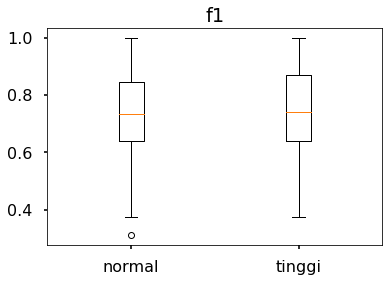

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


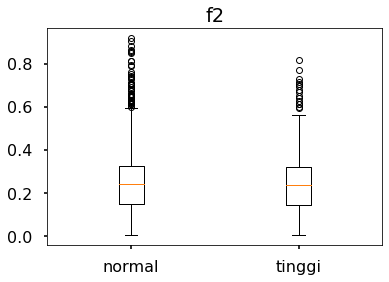

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


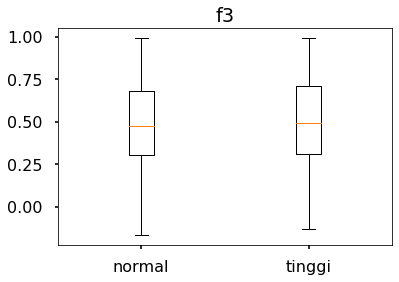

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


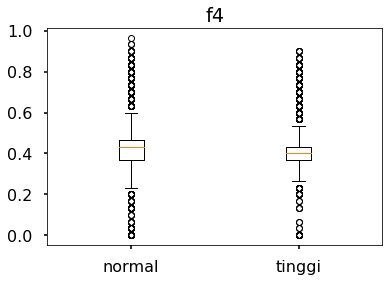

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


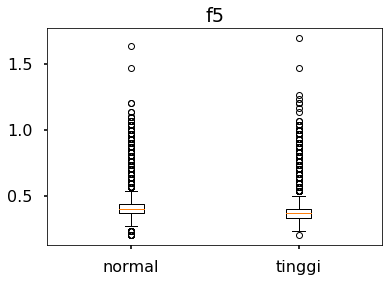

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


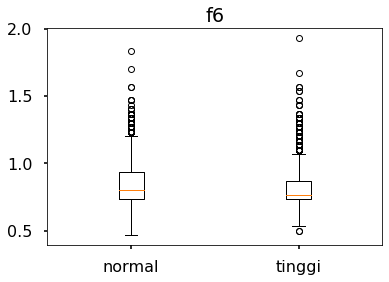

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


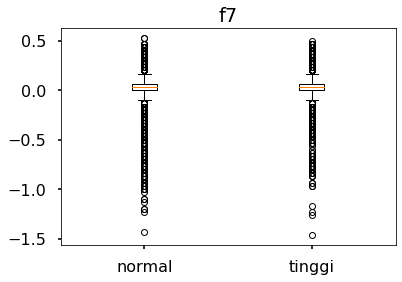

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


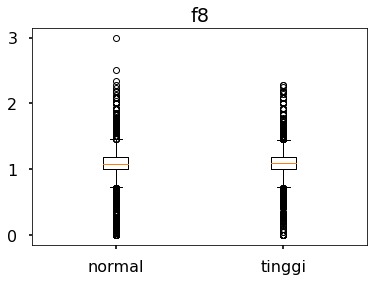

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


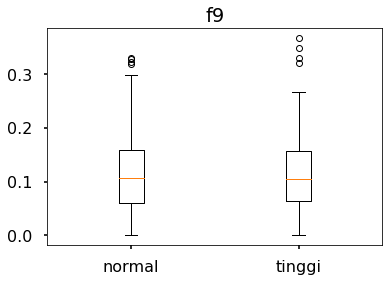

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


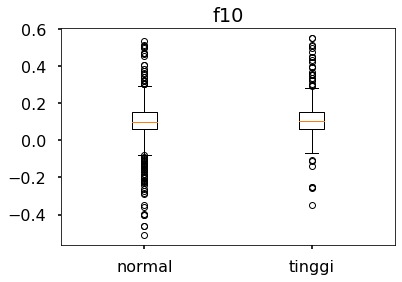

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


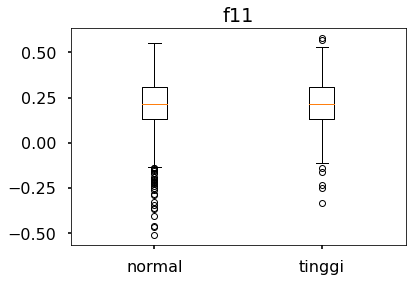

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


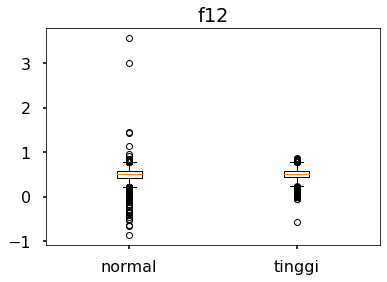

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


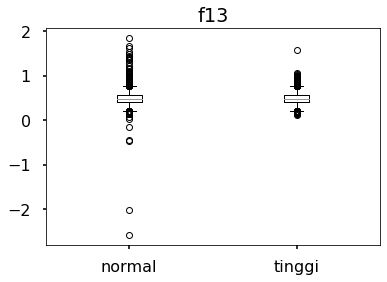

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


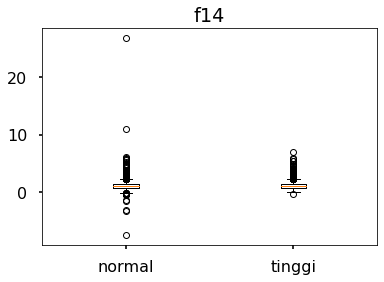

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


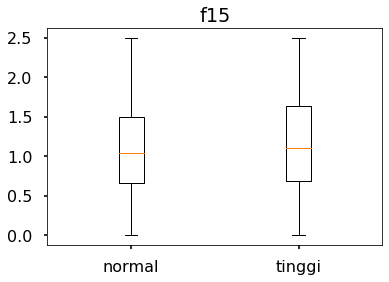

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


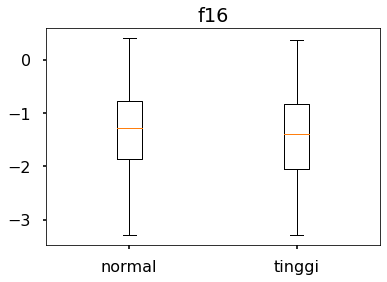

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


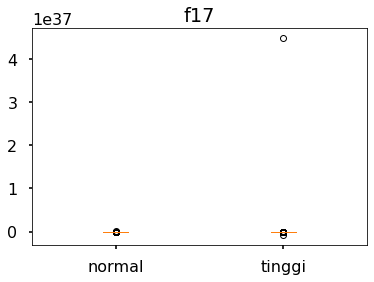

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


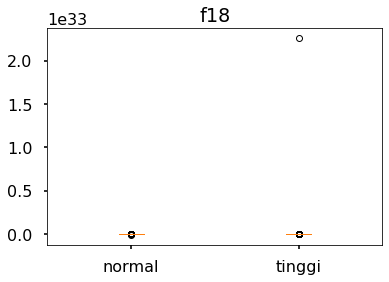

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


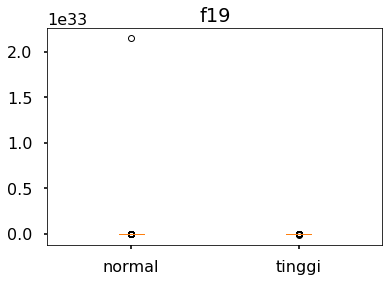

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


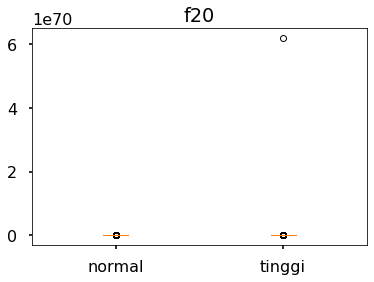

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


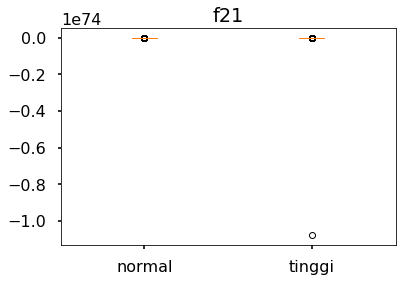

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


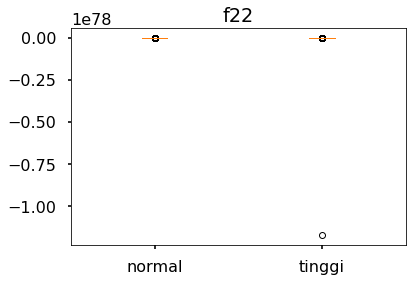

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


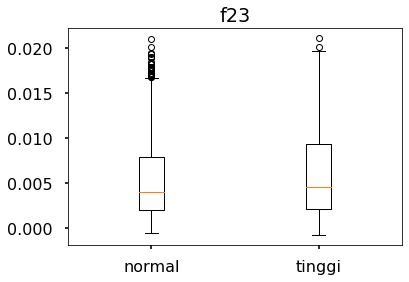

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


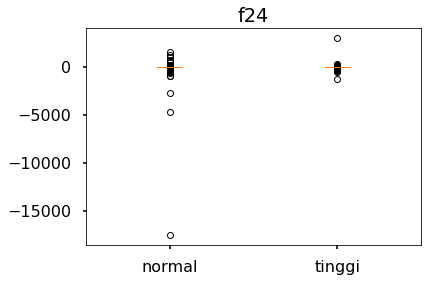

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


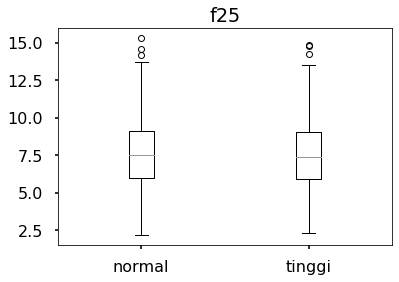

In [ ]:
for i in range(0, 25):
  temp = [data[data.columns[i]].loc[data[data.columns[25]] == 0], data[data.columns[i]].loc[data[data.columns[25]] == 1]]
  plt.title(data.columns[i])
  plt.boxplot(temp)
  plt.xticks([1, 2], ['normal', 'tinggi'])
  plt.show()

2423


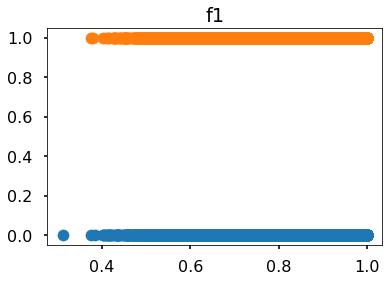

2423


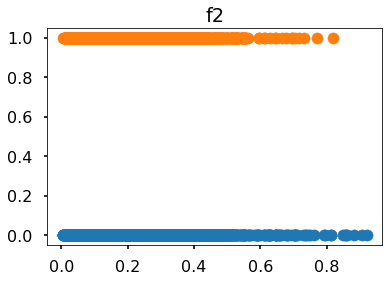

2423


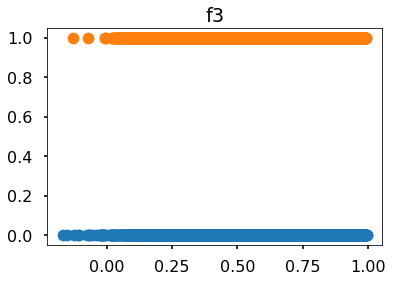

2423


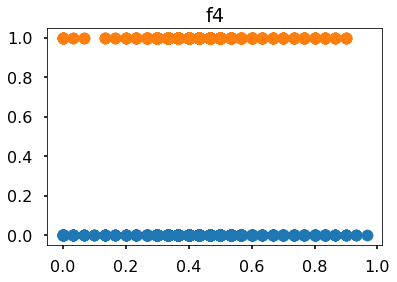

2423


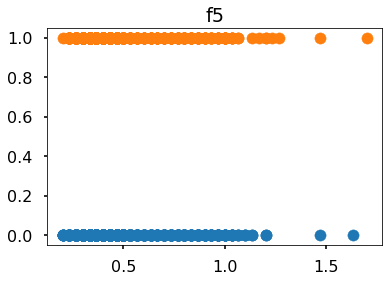

2423


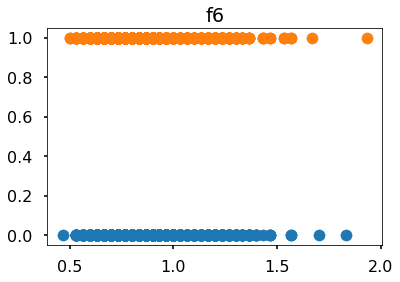

2423


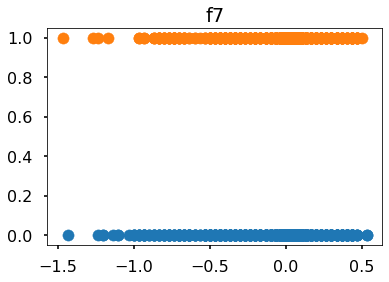

2423


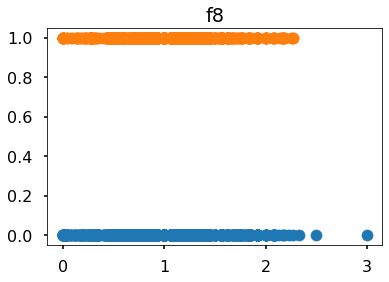

2423


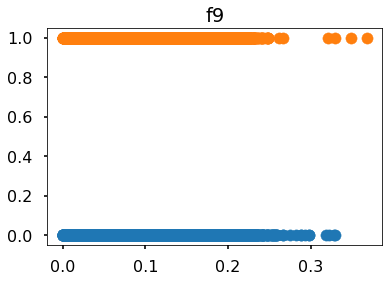

2423


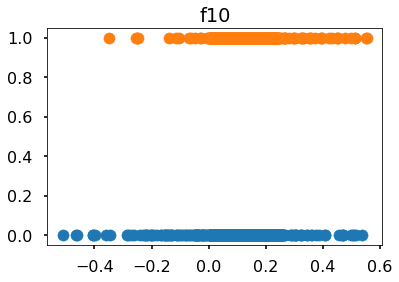

2423


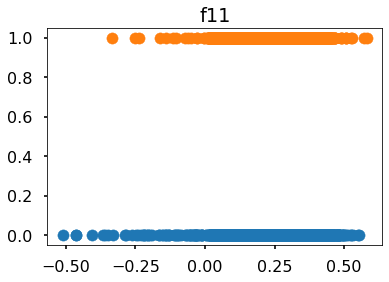

2423


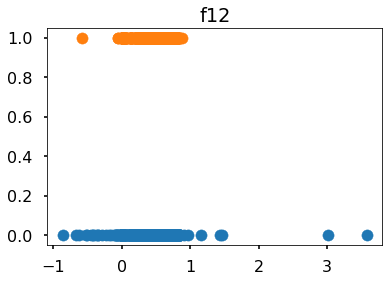

2423


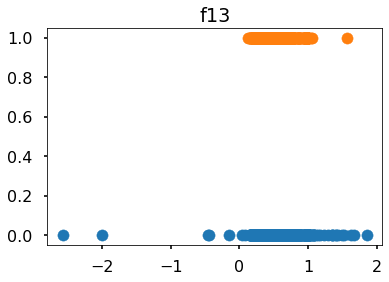

2423


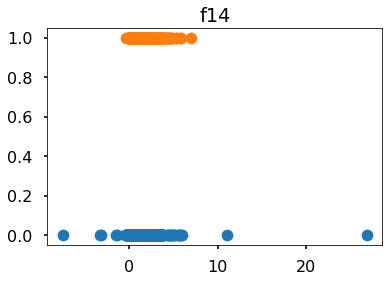

2423


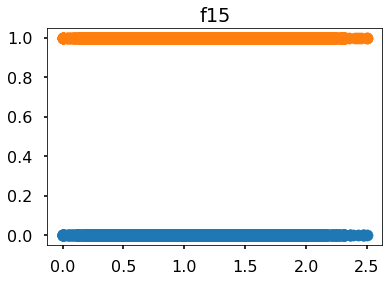

2423


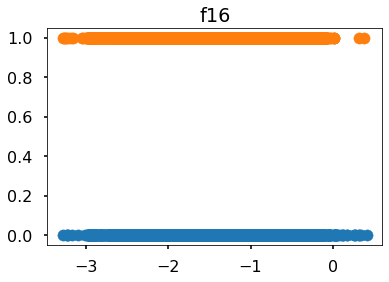

2423


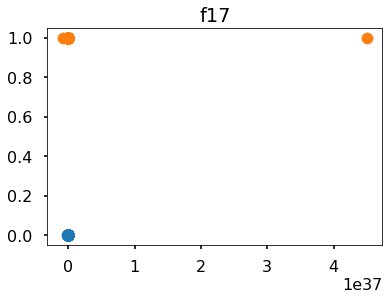

2423


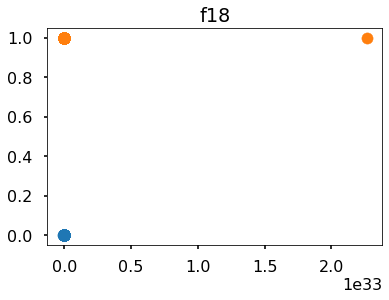

2423


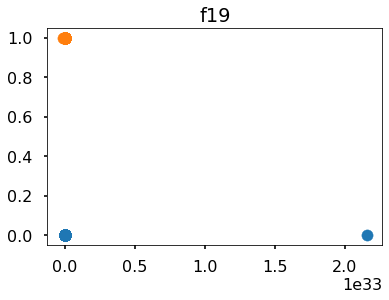

2423


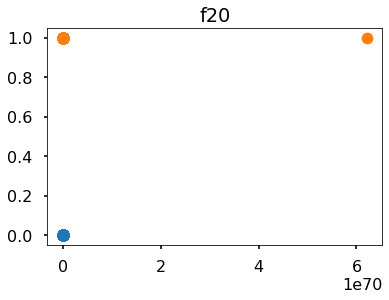

2423


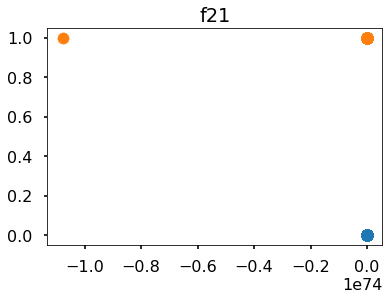

2423


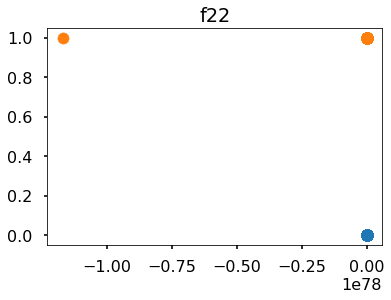

2423


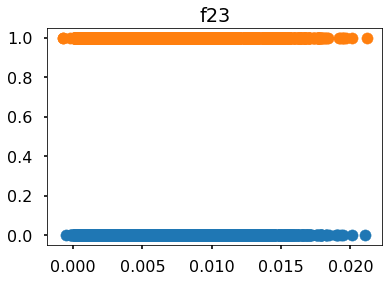

2423


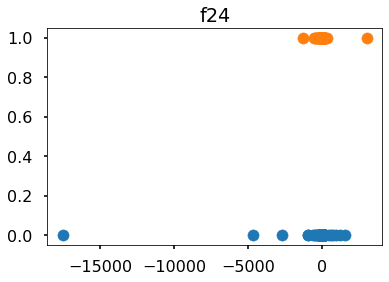

2423


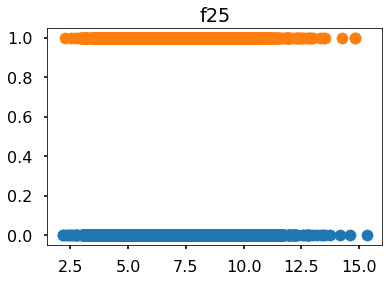

In [ ]:
for i in range(0, 25):
  temp_1 = data[data.columns[i]].loc[data[data.columns[25]] == 0].to_list()
  plt.title(data.columns[i])
  # print(len(temp))
  y = [[0]*3265]
  plt.scatter(temp_1, y)
  temp_2 = data[data.columns[i]].loc[data[data.columns[25]] == 1].to_list()
  print(len(temp_2))
  y = [[1]*2423]
  plt.scatter(temp_2, y)
  plt.show()

# Visualisasi Fitur 2

In [ ]:
data = pd.read_csv(path_fitur_fiks, names=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "f11", "f12", "f13", "f14", "f15", "f16", "f17", "f18", "f19", "f20", "f21", "f22", "f23", "f24", "f25", "label"])

In [ ]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
0,0.766996,0.099504,0.667492,0.400000,0.300000,0.700000,0.100000,1.333333,0.149913,0.093743,...,0.285686,0.183248,0.111958,0.293205,0.197520,0.124623,0.010637,-2.374136,5.307995,0
1,0.843228,0.090554,0.752674,0.400000,0.366667,0.766667,0.033333,1.090909,0.134813,0.159775,...,0.345568,0.216009,0.135944,0.266819,0.197549,0.128686,0.010800,2.075339,6.862803,0
2,0.895969,0.039628,0.856341,0.466667,0.433333,0.900000,0.033333,1.076923,0.210274,0.190224,...,0.314868,0.236534,0.157496,0.337993,0.249432,0.162841,0.010042,-5.895530,8.761323,0
3,0.816314,0.112201,0.704112,0.433333,0.366667,0.800000,0.066667,1.181818,0.159594,0.126166,...,0.295641,0.238280,0.159780,0.321299,0.222492,0.142709,0.008862,-4.170686,6.755812,0
4,0.834060,0.119594,0.714466,0.433333,0.366667,0.800000,0.066667,1.181818,0.157301,0.135288,...,0.318205,0.239557,0.153580,0.305160,0.215409,0.136983,0.009061,-22.862125,7.172283,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.947886,0.060559,0.887326,0.466667,0.500000,0.966667,-0.033333,0.933333,0.223511,0.223709,...,0.316364,0.237643,0.157047,0.393807,0.291643,0.199875,0.009390,-4.208604,10.814499,0
1298,0.942042,0.118520,0.823522,0.500000,0.400000,0.900000,0.100000,1.250000,0.200196,0.169247,...,0.376104,0.237381,0.162533,0.321901,0.230780,0.149366,0.009534,-18.039106,9.835510,0
1299,0.845911,0.114804,0.731106,0.533333,0.400000,0.933333,0.133333,1.333333,0.177200,0.168291,...,0.431513,0.295014,0.201608,0.311232,0.229822,0.150469,0.007044,3.227340,8.579941,0
1300,0.895813,0.099590,0.796223,0.433333,0.433333,0.866667,0.000000,1.000000,0.176023,0.174083,...,0.297246,0.219326,0.141202,0.360080,0.274717,0.195157,0.009552,-4.412373,8.691154,0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


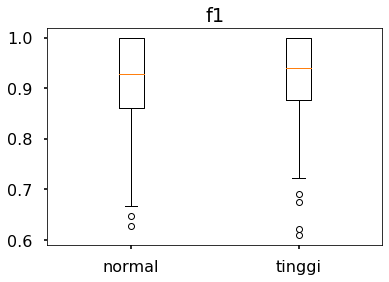

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


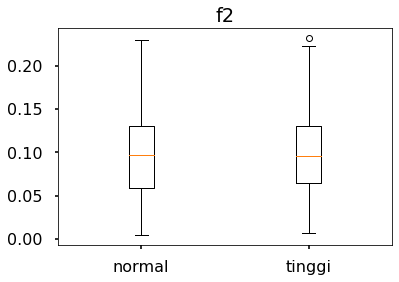

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


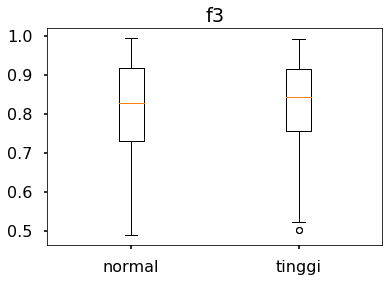

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


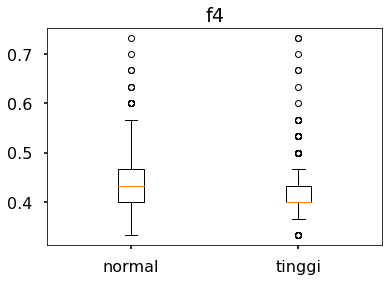

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


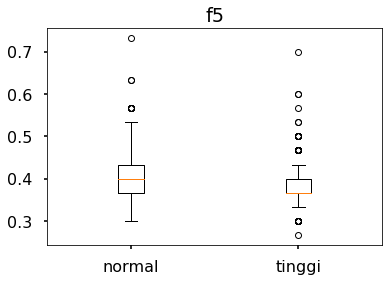

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


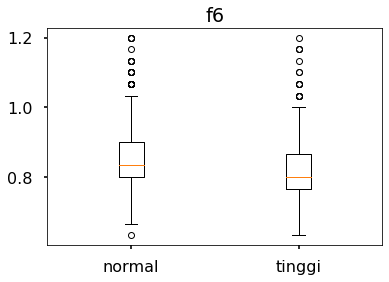

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


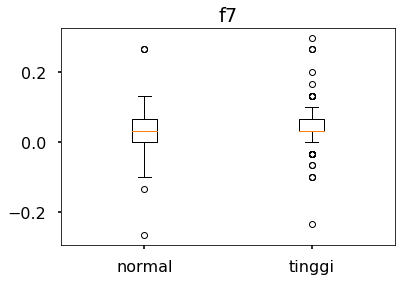

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


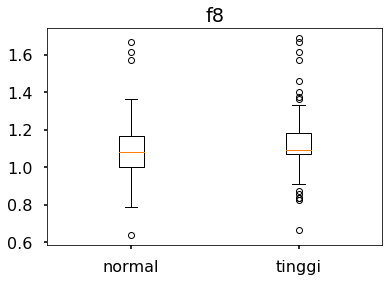

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


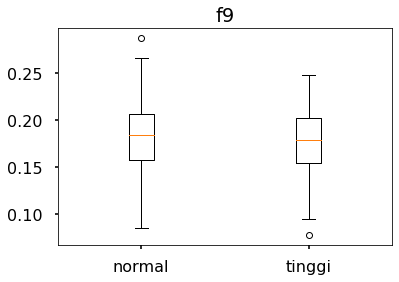

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


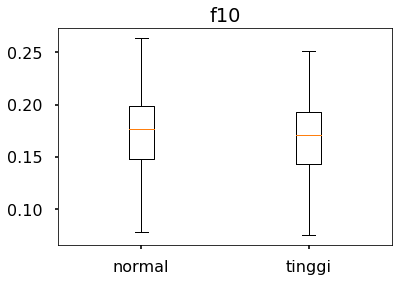

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


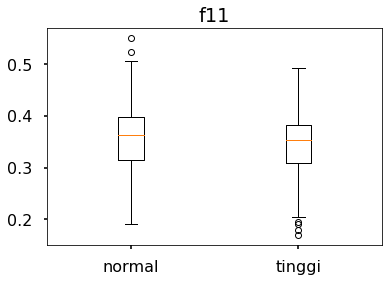

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


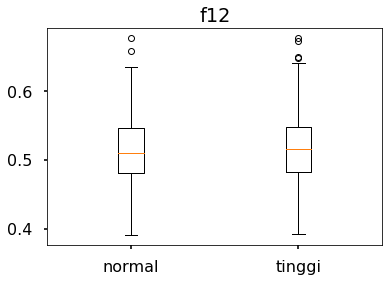

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


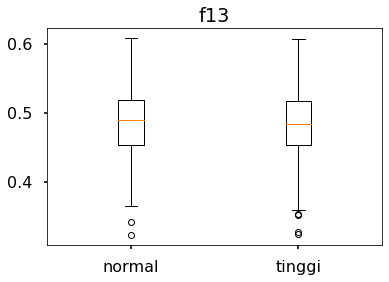

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


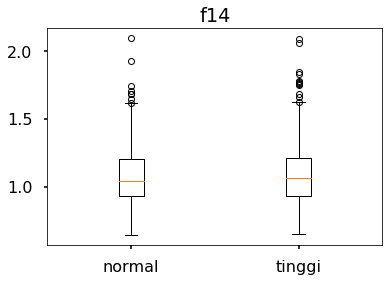

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


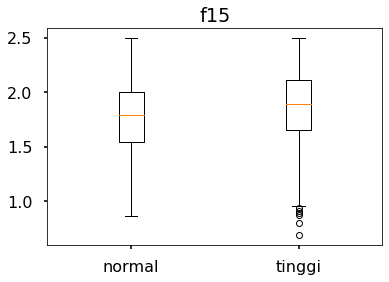

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


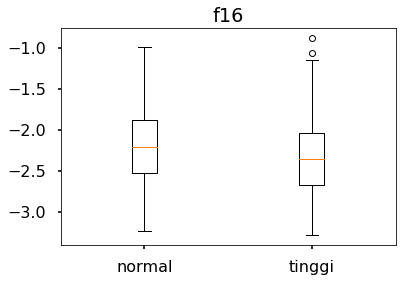

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


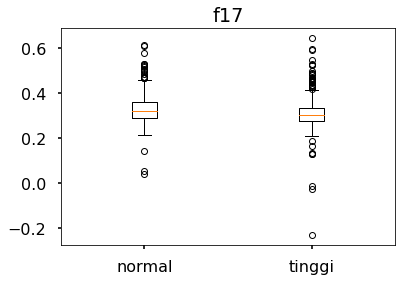

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


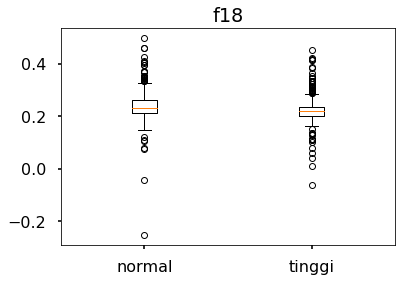

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


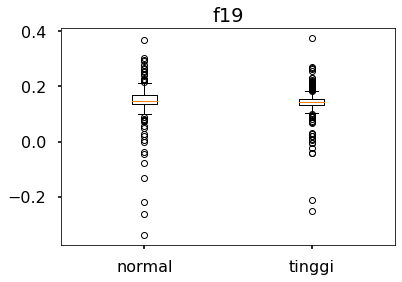

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


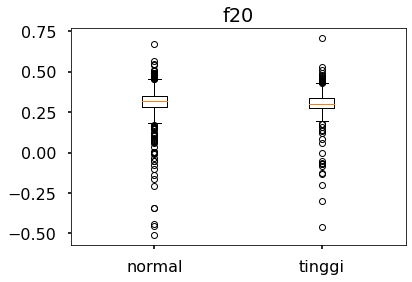

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


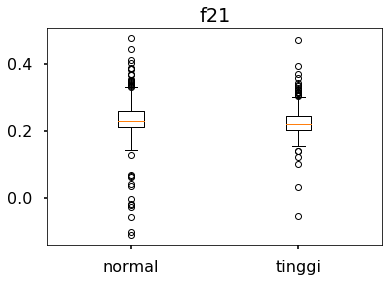

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


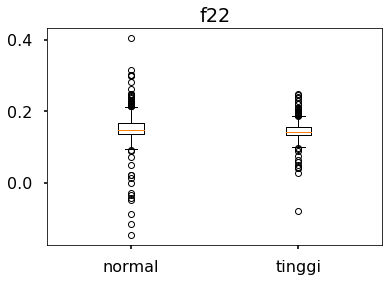

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


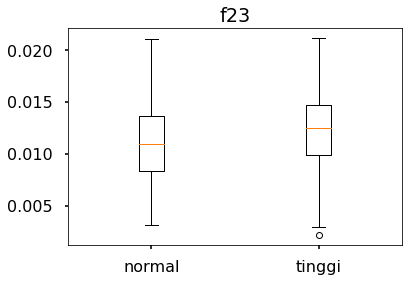

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


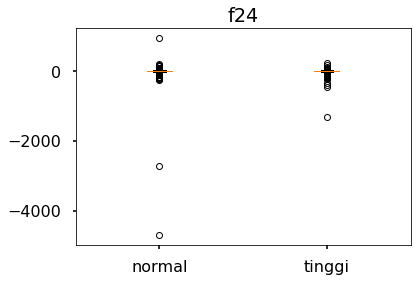

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


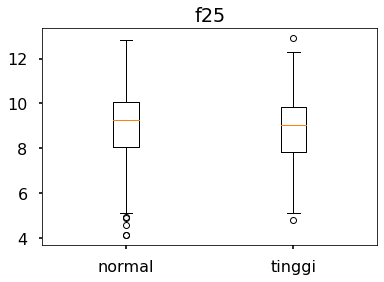

In [ ]:
for i in range(0, 25):
  temp = [data[data.columns[i]].loc[data[data.columns[25]] == 0], data[data.columns[i]].loc[data[data.columns[25]] == 1]]
  plt.title(data.columns[i])
  plt.boxplot(temp)
  plt.xticks([1, 2], ['normal', 'tinggi'])
  plt.show()

731
571


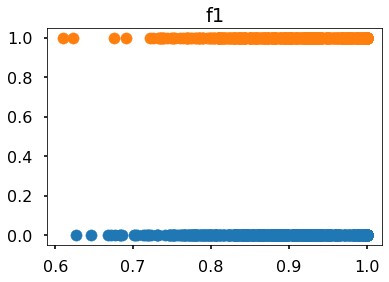

731
571


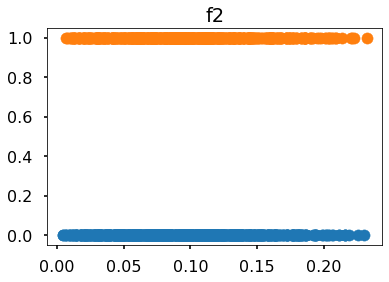

731
571


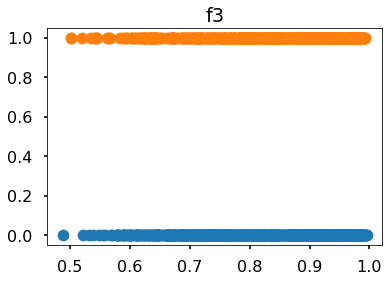

731
571


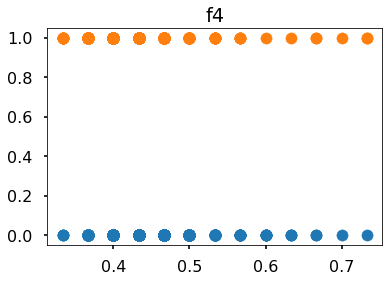

731
571


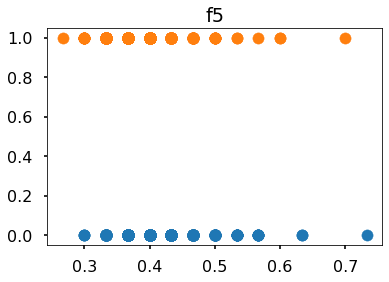

731
571


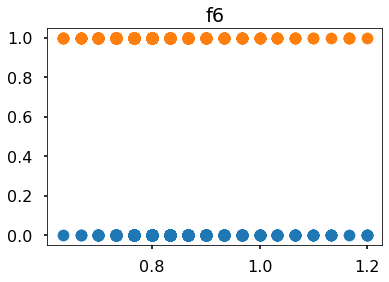

731
571


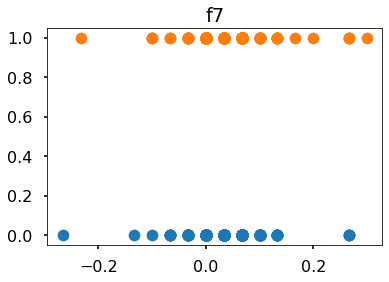

731
571


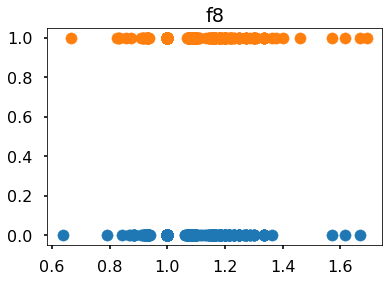

731
571


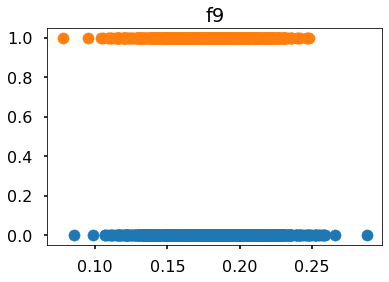

731
571


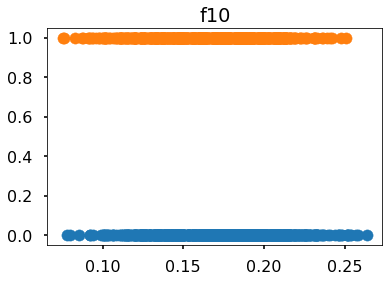

731
571


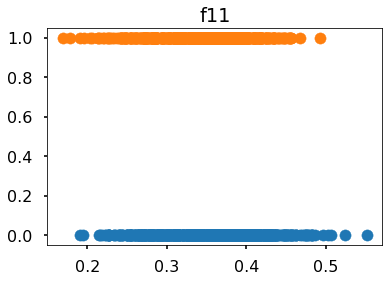

731
571


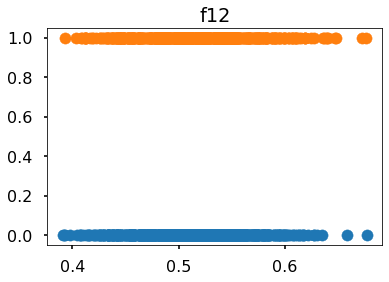

731
571


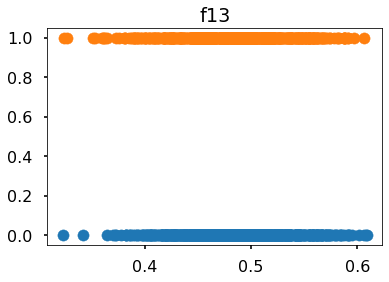

731
571


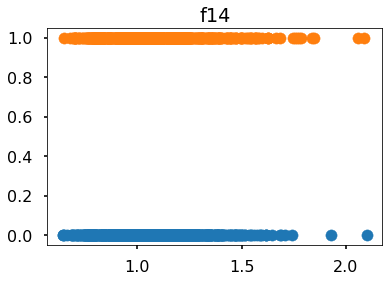

731
571


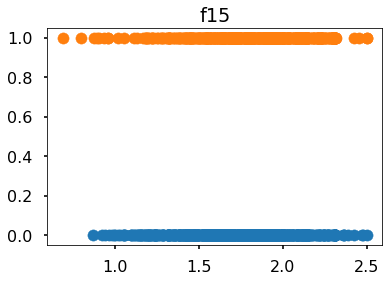

731
571


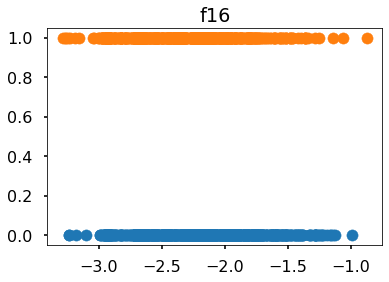

731
571


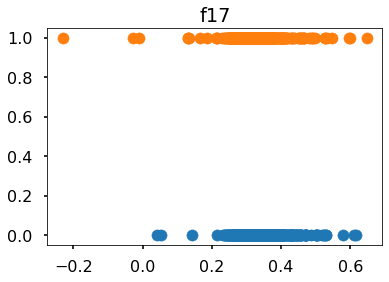

731
571


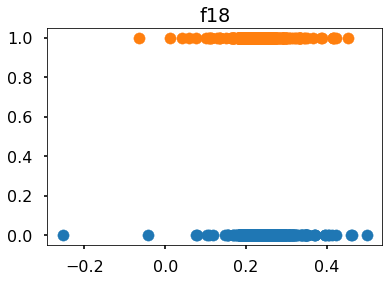

731
571


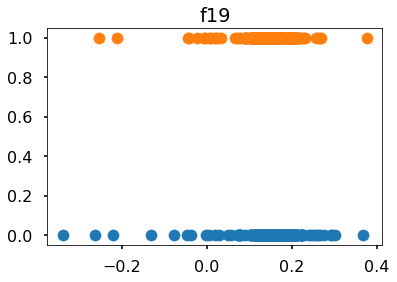

731
571


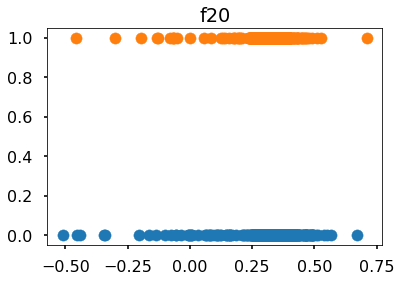

731
571


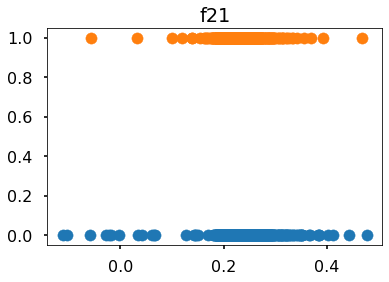

731
571


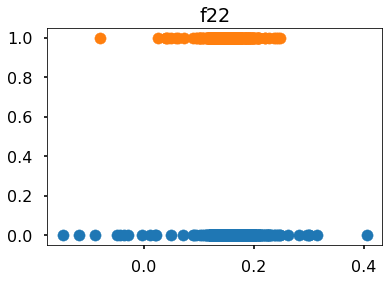

731
571


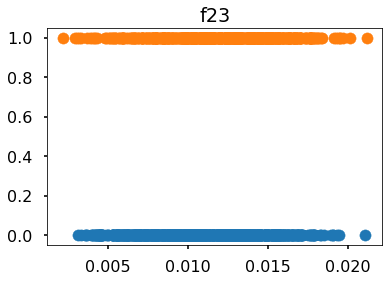

731
571


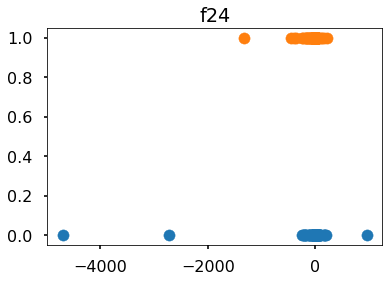

731
571


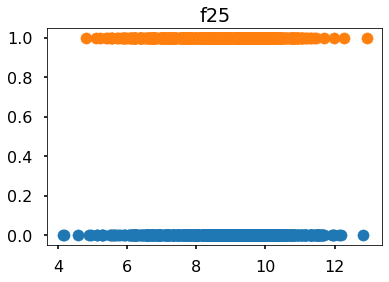

In [ ]:
for i in range(0, 25):
  temp_1 = data[data.columns[i]].loc[data[data.columns[25]] == 0].to_list()
  plt.title(data.columns[i])
  print(len(temp_1))
  y = [[0]*731]
  plt.scatter(temp_1, y)
  temp_2 = data[data.columns[i]].loc[data[data.columns[25]] == 1].to_list()
  print(len(temp_2))
  y = [[1]*571]
  plt.scatter(temp_2, y)
  plt.show()

# Seleksi Fitur

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
data = pd.read_csv(path_fitur_fiks, names=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "f11", "f12", "f13", "f14", "f15", "f16", "f17", "f18", "f19", "f20", "f21", "f22", "f23", "f24", "f25", "label"])

In [ ]:
x = data.drop('label', 1)
y = data['label']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
0,0.766996,0.099504,0.667492,0.400000,0.300000,0.700000,0.100000,1.333333,0.149913,0.093743,...,0.285686,0.183248,0.111958,0.293205,0.197520,0.124623,0.010637,-2.374136,5.307995,0
1,0.843228,0.090554,0.752674,0.400000,0.366667,0.766667,0.033333,1.090909,0.134813,0.159775,...,0.345568,0.216009,0.135944,0.266819,0.197549,0.128686,0.010800,2.075339,6.862803,0
2,0.895969,0.039628,0.856341,0.466667,0.433333,0.900000,0.033333,1.076923,0.210274,0.190224,...,0.314868,0.236534,0.157496,0.337993,0.249432,0.162841,0.010042,-5.895530,8.761323,0
3,0.816314,0.112201,0.704112,0.433333,0.366667,0.800000,0.066667,1.181818,0.159594,0.126166,...,0.295641,0.238280,0.159780,0.321299,0.222492,0.142709,0.008862,-4.170686,6.755812,0
4,0.834060,0.119594,0.714466,0.433333,0.366667,0.800000,0.066667,1.181818,0.157301,0.135288,...,0.318205,0.239557,0.153580,0.305160,0.215409,0.136983,0.009061,-22.862125,7.172283,0


In [ ]:
print(data['label'].value_counts()[0])
print(data['label'].value_counts()[1])

731
571


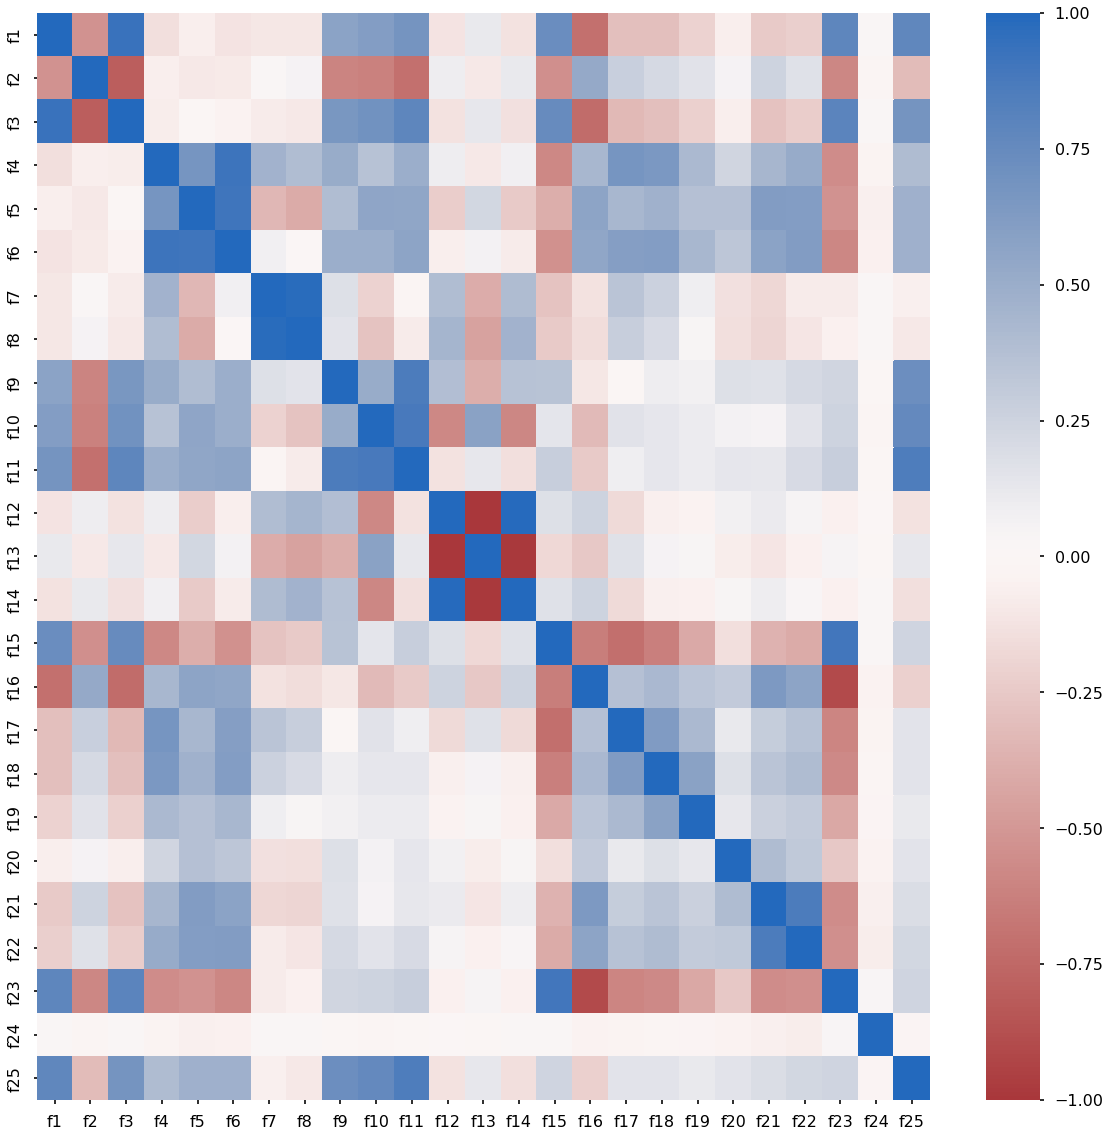

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = x.corr()
sns.heatmap(cor, cmap='vlag_r')
plt.show()

In [ ]:
names=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "f11", "f12", "f13", "f14", "f15", "f16", "f17", "f18", "f19", "f20", "f21", "f22", "f23", "f24", "f25"]

for fitur in names:
  #Correlation with output variable
  cor_target = abs(cor[fitur])
  #Selecting highly correlated features
  relevant_features = cor_target[cor_target>0.7]
  print("Nilai untuk fitur " + fitur)
  print(relevant_features)
  print("\n")

Nilai untuk fitur f1
f1     1.000000
f3     0.933030
f15    0.730831
f16    0.710528
f23    0.782812
f25    0.775774
Name: f1, dtype: float64


Nilai untuk fitur f2
f2     1.000000
f3     0.798102
f11    0.707676
Name: f2, dtype: float64


Nilai untuk fitur f3
f1     0.933030
f2     0.798102
f3     1.000000
f11    0.782904
f15    0.747949
f16    0.727876
f23    0.804334
Name: f3, dtype: float64


Nilai untuk fitur f4
f4    1.000000
f6    0.920233
Name: f4, dtype: float64


Nilai untuk fitur f5
f5    1.000000
f6    0.909689
Name: f5, dtype: float64


Nilai untuk fitur f6
f4    0.920233
f5    0.909689
f6    1.000000
Name: f6, dtype: float64


Nilai untuk fitur f7
f7    1.000000
f8    0.980112
Name: f7, dtype: float64


Nilai untuk fitur f8
f7    0.980112
f8    1.000000
Name: f8, dtype: float64


Nilai untuk fitur f9
f9     1.000000
f11    0.862400
f25    0.725032
Name: f9, dtype: float64


Nilai untuk fitur f10
f10    1.000000
f11    0.878016
f25    0.764354
Name: f10, dtype: float64


N

In [ ]:
# f1, f2, f4, f6, f7, f12, f14, f17, f19, f20, f24, f25
# f1, f3, f15, f16
# f1, f3, f9, f15, f16, f25

# x = x.drop(['f3', 'f5', 'f8', 'f9', 'f10', 'f11', 'f13', 'f15', 'f16', 'f18', 'f21', 'f22', 'f23'], 1)
x = x.drop(["f1", "f2", "f3", 'f9', "f10", "f11", "f12", "f13", "f14", 'f15', 'f16', "f17", "f18", "f19", "f20", "f21", "f22", "f23", "f24"], 1)
# x = x.drop(["f17", "f18", "f19", "f20", "f21", "f22", "f24"], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


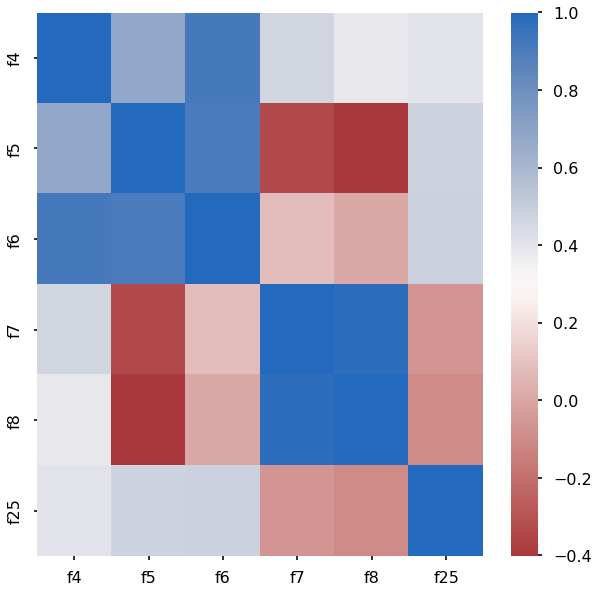

Nilai untuk fitur f4
f4    1.000000
f6    0.920233
Name: f4, dtype: float64


Nilai untuk fitur f5
f5    1.000000
f6    0.909689
Name: f5, dtype: float64


Nilai untuk fitur f6
f4    0.920233
f5    0.909689
f6    1.000000
Name: f6, dtype: float64


Nilai untuk fitur f7
f7    1.000000
f8    0.980112
Name: f7, dtype: float64


Nilai untuk fitur f8
f7    0.980112
f8    1.000000
Name: f8, dtype: float64




In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = x.corr()
sns.heatmap(cor, cmap='vlag_r')
plt.show()

# names=['f1', 'f2', 'f4', 'f6', 'f7', 'f12', 'f14', 'f17', 'f19', 'f20', 'f24', 'f25']
# names = names=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "f11", "f12", "f13", "f14", "f15", "f16", "f23", "f25"]
names = ['f4', 'f5', 'f6', 'f7', 'f8']

for fitur in names:
  #Correlation with output variable
  cor_target = abs(cor[fitur])
  #Selecting highly correlated features
  relevant_features = cor_target[cor_target>0.7]
  print("Nilai untuk fitur " + fitur)
  print(relevant_features)
  print("\n")

# SVM

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model
from sklearn.metrics import confusion_matrix

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import pylab as pl

In [ ]:
# C_range = 10. ** np.arange(-3, 2)
# gamma_range = 10. ** np.arange(-3, 2)

# param_grid = dict(gamma=gamma_range, C=C_range)

# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold())

# grid.fit(x, y)

# print("The best classifier is: ", grid.best_estimator_)

# # plot the scores of the grid
# # grid_scores_ contains parameter settings and scores
# score_dict = grid.cv_results_

# # We extract just the scores
# scores = [x[1] for x in score_dict]
# scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# # Make a nice figure
# pl.figure(figsize=(8, 6))
# pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
# pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
# pl.xlabel('gamma')
# pl.ylabel('C')
# pl.colorbar()
# pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
# pl.yticks(np.arange(len(C_range)), C_range)
# pl.show()

The best classifier is:  SVC(gamma=0.1)


ValueError: ignored

In [ ]:
def fitting(X, y, C, gamma):
    print("Parameter: ")
    print("C= " + str(C))
    print("gamma= " + str(gamma))

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma)
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Confussion matrix
    print('----- Confussion Matrix -----')
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print('--------------------------------------------------------')

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

In [ ]:
temp = x[['f1', 'f3', 'f15', 'f16']]
X_train, X_test, y_train, y_test, clf = fitting(temp, y, 1, 30)

Parameter: 
C= 1
gamma= 30
----- Confussion Matrix -----
[[692 151]
 [417 162]]
--------------------------------------------------------
----- Evaluation on Test Data -----
Accuracy Score:  0.60056258790436
              precision    recall  f1-score   support

           0       0.62      0.82      0.71       843
           1       0.52      0.28      0.36       579

    accuracy                           0.60      1422
   macro avg       0.57      0.55      0.54      1422
weighted avg       0.58      0.60      0.57      1422

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6455696202531646
              precision    recall  f1-score   support

           0       0.64      0.86      0.73      2422
           1       0.67      0.36      0.47      1844

    accuracy                           0.65      4266
   macro avg       0.65      0.61      0.60      4266
weighted avg       0.65      0.65      0.62      4266

------

In [ ]:
temp = x[['f1', 'f15', 'f16']]
X_train, X_test, y_train, y_test, clf = fitting(x, y, 50, 3)

Parameter: 
C= 50
gamma= 3
----- Confussion Matrix -----
[[587 226]
 [383 226]]
--------------------------------------------------------
----- Evaluation on Test Data -----
Accuracy Score:  0.5717299578059072
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       813
           1       0.50      0.37      0.43       609

    accuracy                           0.57      1422
   macro avg       0.55      0.55      0.54      1422
weighted avg       0.56      0.57      0.56      1422

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7306610407876231
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      2452
           1       0.74      0.57      0.64      1814

    accuracy                           0.73      4266
   macro avg       0.73      0.71      0.71      4266
weighted avg       0.73      0.73      0.72      4266

----

In [ ]:
X_train, X_test, y_train, y_test, clf = fitting(x, y, 75, 10)

Parameter: 
C= 75
gamma= 10
----- Confussion Matrix -----
[[134  49]
 [ 86  57]]
--------------------------------------------------------
----- Evaluation on Test Data -----
Accuracy Score:  0.5858895705521472
              precision    recall  f1-score   support

           0       0.61      0.73      0.67       183
           1       0.54      0.40      0.46       143

    accuracy                           0.59       326
   macro avg       0.57      0.57      0.56       326
weighted avg       0.58      0.59      0.57       326

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7059426229508197
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       548
           1       0.74      0.51      0.61       428

    accuracy                           0.71       976
   macro avg       0.71      0.68      0.69       976
weighted avg       0.71      0.71      0.70       976

---

In [ ]:
for gamma in np.arange(1, 6):
  for c in np.arange(50, 61):
    X_train, X_test, y_train, y_test, clf = fitting(x, y, c, gamma)

Parameter: 
C= 50
gamma= 1
----- Confussion Matrix -----
[[147  36]
 [101  42]]
--------------------------------------------------------
----- Evaluation on Test Data -----
Accuracy Score:  0.5797546012269938
              precision    recall  f1-score   support

           0       0.59      0.80      0.68       183
           1       0.54      0.29      0.38       143

    accuracy                           0.58       326
   macro avg       0.57      0.55      0.53       326
weighted avg       0.57      0.58      0.55       326

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6219262295081968
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       548
           1       0.65      0.30      0.41       428

    accuracy                           0.62       976
   macro avg       0.63      0.59      0.57       976
weighted avg       0.63      0.62      0.58       976

----

In [ ]:
for gamma in np.arange(1.1, 2.1, 0.1):
  X_train, X_test, y_train, y_test, clf = fitting(x, y, 0.7, gamma)

Parameter: 
C= 0.7
gamma= 1.1
----- Confussion Matrix -----
[[779  49]
 [549  45]]
--------------------------------------------------------
----- Evaluation on Test Data -----
Accuracy Score:  0.5794655414908579
              precision    recall  f1-score   support

           0       0.59      0.94      0.72       828
           1       0.48      0.08      0.13       594

    accuracy                           0.58      1422
   macro avg       0.53      0.51      0.43      1422
weighted avg       0.54      0.58      0.48      1422

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9177215189873418
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2437
           1       0.96      0.85      0.90      1829

    accuracy                           0.92      4266
   macro avg       0.92      0.91      0.91      4266
weighted avg       0.92      0.92      0.92      4266

-

In [ ]:
for gamma in np.arange(2, 3.1, 0.1):
  for c in np.arange(1, 1.5, 0.1):
    X_train, X_test, y_train, y_test, clf = fitting(x, y, c, gamma)

Parameter: 
C= 1.0
gamma= 2.0
----- Confussion Matrix -----
[[756  55]
 [555  56]]
--------------------------------------------------------
----- Evaluation on Test Data -----
Accuracy Score:  0.5710267229254571
              precision    recall  f1-score   support

           0       0.58      0.93      0.71       811
           1       0.50      0.09      0.16       611

    accuracy                           0.57      1422
   macro avg       0.54      0.51      0.43      1422
weighted avg       0.55      0.57      0.47      1422

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.5879043600562588
              precision    recall  f1-score   support

           0       0.59      0.94      0.72      2454
           1       0.58      0.11      0.18      1812

    accuracy                           0.59      4266
   macro avg       0.58      0.53      0.45      4266
weighted avg       0.59      0.59      0.49      4266

-

In [ ]:
for gamma in np.arange(1.1, 2.1, 0.1):
  X_train, X_test, y_train, y_test, clf = fitting(x, y, 0.7, gamma)

Parameter: 
C= 0.7
gamma= 1.1
----- Confussion Matrix -----
[[740  65]
 [546  71]]
--------------------------------------------------------
----- Evaluation on Test Data -----
Accuracy Score:  0.570323488045007
              precision    recall  f1-score   support

           0       0.58      0.92      0.71       805
           1       0.52      0.12      0.19       617

    accuracy                           0.57      1422
   macro avg       0.55      0.52      0.45      1422
weighted avg       0.55      0.57      0.48      1422

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.586966713548992
              precision    recall  f1-score   support

           0       0.59      0.93      0.72      2460
           1       0.56      0.11      0.19      1806

    accuracy                           0.59      4266
   macro avg       0.57      0.52      0.46      4266
weighted avg       0.58      0.59      0.50      4266

---